# Predicting Water Levels Using Gradient Boosting Regressor and LSTM Models: A Case Study of Lago de Chapala Dam

***A Python Google Colab implementation***

****
Based on these [dataset 1](https://smn.conagua.gob.mx/es/informacion-climatologica-por-estado?estado=jal) and [dataset 2](https://datos.jalisco.gob.mx/dataset/registro-de-niveles-de-agua-en-la-presa-lago-de-chapala-jalisco), the repositories of the Climatic Normals by State (Jalisco, Lake Chapala station) and the Water Level of Lake Chapala, respectively.
****
By

- Jesús Dassaef López Barrios
      dass.lopez.barrios@hotmail.com
      A01366815@tec.mx


*We need the following files before continuing:*
*   **original_presa_chapala_since_1991.csv**
*   **temp_diaria_chapala.txt**

You can find them in the original repositories.

## Summary

*Dataset*

The dataset used for this analysis contains daily records from 1991 to 2024, which include various environmental and temporal features that potentially affect the water level (almacenamiento_hm3). The features in the dataset are as follows:
- `fecha`: The date of the record.
- `PRECIP_mm`: The daily precipitation in millimeters.
- `EVAP_mm`: The daily evaporation in millimeters.
- `TMAX_c`: The daily maximum temperature in Celsius.
- `TMIN_c`: The daily minimum temperature in Celsius.
- `almacenamiento_hm3`: The daily water storage in cubic hectometers.
- Additional temporal features such as the year, month, day of the year, day of the week, and week of the year are extracted from the `fecha` column for more detailed analysis.
- A 1-day lag feature for `almacenamiento_hm3` is also created to incorporate the previous day's water level.

*Procedure*

1. **Data Preparation**:
   - The dataset is loaded, and the `fecha` column is converted to a datetime format.
   - Additional temporal features (year, month, day of the year, day of the week, and week of the year) are extracted from the `fecha` column.
   - A 1-day lag feature for `almacenamiento_hm3` is created to include the previous day's water level in the analysis.
   - The dataset is split into training and testing sets based on an 80/20 split of the date range.

2. **Gradient Boosting Model**:
   - **Without 1-Day Lag**:
     - The features and target variable are defined without the 1-day lag feature.
     - The model is trained using GridSearchCV to find the best hyperparameters.
     - The model's performance is evaluated using RMSE, MAE, and R² metrics.
   - **With 1-Day Lag**:
     - The features and target variable include the 1-day lag feature.
     - The model is trained using GridSearchCV to find the best hyperparameters.
     - The model's performance is evaluated using RMSE, MAE, and R² metrics.
   - **Results**:
     - The Gradient Boosting model with the 1-day lag feature performs the best, providing the lowest RMSE and highest R² score.

3. **LSTM Model**:
   - **Without 1-Day Lag**:
     - The features and target variable are defined without the 1-day lag feature.
     - The data is scaled using MinMaxScaler.
     - Sequences of 30 days of historical data are created to predict the next day's water level.
     - The LSTM model is defined and trained with dropout layers to prevent overfitting.
     - The model's performance is evaluated using RMSE, MAE, and R² metrics.
   - **With 1-Day Lag**:
     - The features and target variable include the 1-day lag feature.
     - The data is scaled using MinMaxScaler.
     - Sequences of 30 days of historical data are created to predict the next day's water level.
     - The LSTM model is defined and trained with dropout layers to prevent overfitting.
     - The model's performance is evaluated using RMSE, MAE, and R² metrics.

4. **Visualization**:
   - Various plots are generated to compare actual vs. predicted values for training and testing data.
   - Additional plots include error analysis, residual distribution, and a feature correlation heatmap.


## Description

This project involves analyzing and predicting water levels using two different machine learning approaches: Gradient Boosting and Long Short-Term Memory (LSTM) networks. The dataset spans from 1991 to 2024 and includes various environmental and temporal features that impact water levels. The steps taken in this project include data preparation, model training, evaluation, and visualization.

**Data Preparation:**
- The dataset is loaded, and the `fecha` column is converted to datetime format to extract temporal features such as the year, month, day of the year, day of the week, and week of the year.
- A 1-day lag feature for `almacenamiento_hm3` is created to incorporate the previous day's water level into the analysis.
- The dataset is split into training and testing sets based on an 80/20 split of the date range.

**Modeling Approaches:**
1. **Gradient Boosting:**
   - Two models are trained: one without the 1-day lag feature and one with it.
   - Hyperparameter tuning is performed using GridSearchCV to find the best combination of hyperparameters.
   - Model performance is evaluated using RMSE, MAE, and R² metrics.
   - The Gradient Boosting model with the 1-day lag feature performs the best, indicating the importance of including previous day's water level in the predictions.

2. **LSTM:**
   - Two models are trained: one without the 1-day lag feature and one with it.
   - The data is scaled using MinMaxScaler, and sequences of 30 days of historical data are created to predict the next day's water level.
   - The LSTM model includes dropout layers to prevent overfitting and is trained using the Adam optimizer with mean squared error as the loss function.
   - Model performance is evaluated using RMSE, MAE, and R² metrics.
   - The LSTM model with the 1-day lag feature shows improved performance compared to the model without it, highlighting the benefit of including the lag feature.

**Visualization:**
- Various plots are generated to visualize the actual vs. predicted values for both training and testing data.
- Error analysis and residual distribution plots are created to understand the model's prediction errors over time.
- A correlation heatmap is produced to examine the relationships between different features in the dataset.


Next, the code implemented for this assignment is presented:

## Code

### Data cleaning, integration and formatting (tyding)

As a first step, let's visualize the original datasets used to generate the final datasets for our models:

*   original_presa_chapala_since_1991.csv
*   temp_diaria_chapala.txt



In [ ]:
# original_presa_chapala_since_1991.csv

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the data from Google Drive
import pandas as pd

# Path to the CSV file in your Google Drive
file_path = '/content/drive/My Drive/ML/final_project/data/original_presa_chapala_since_1991.csv'
data_original_water_level = pd.read_csv(file_path)

# Step 3: Display the first few rows of the dataframe to understand its structure
data_original_water_level.head()

Mounted at /content/drive


,clave_sih,fecha,nombre_oficial,nombre_comun,estado,municipio,almacenamiento_hm3,elevacion_msnm,uso,namo_almacenamiento_hm3,namo_elevacion_msnm,porcentaje_llenado,bordo_libre_m,name_almacenamiento_hm3,name_elevacion_msnm
0,LDCJL,01/01/1991,Lago de Chapala,Chapala,Jalisco,Chapala,1505.8,92.91,AP,8126.41,98.0,0.185297,0,9279.71,99
1,LDCJL,02/01/1991,Lago de Chapala,Chapala,Jalisco,Chapala,1505.8,92.91,AP,8126.41,98.0,0.185297,0,9279.71,99
2,LDCJL,03/01/1991,Lago de Chapala,Chapala,Jalisco,Chapala,1498.0,92.90,AP,8126.41,98.0,0.184337,0,9279.71,99
3,LDCJL,04/01/1991,Lago de Chapala,Chapala,Jalisco,Chapala,1498.0,92.90,AP,8126.41,98.0,0.184337,0,9279.71,99
4,LDCJL,05/01/1991,Lago de Chapala,Chapala,Jalisco,Chapala,1498.0,92.90,AP,8126.41,98.0,0.184337,0,9279.71,99


In [ ]:
# temp_diaria_chapala.txt

file_path = '/content/drive/My Drive/ML/final_project/data/temp_diaria_chapala.txt'

# Read the temp_diaria_chapala.txt file
with open(file_path, 'r') as file:
    lines = file.readlines()

print("\nFirst few rows of temp_diaria_chapala.txt file:")
print('\n')
# Display the first 30 lines
for line in lines[:30]:
    print(line.strip())


First few rows of temp_diaria_chapala.txt file:


COMISIÓN NACIONAL DEL AGUA
COORDINACIÓN GENERAL DEL SERVICIO METEOROLÓGICO NACIONAL
BASE DE DATOS CLIMATOLÓGICA
DATOS DISPONIBLES EN LA BASE DE DATOS A: MARZO DE 2024; CON LA INFORMACIÓN SUMINISTRADA POR LAS OFICINAS REGIONALES

ESTACIÓN  : 14040
NOMBRE    : CHAPALA
ESTADO    : JALISCO
MUNICIPIO : CHAPALA
SITUACIÓN : OPERANDO
CVE-OMM   :
LATITUD   : 20.29 °
LONGITUD  : -103.1891667 °
ALTITUD   : 1530 msnm

EMISIÓN   : 22/03/2024



FECHA		PRECIP	EVAP	TMAX	TMIN
(mm)	(mm)	(°C )	(°C)
1934-04-01	0	NULO	NULO	NULO
1934-04-02	0	5.9	NULO	NULO
1934-04-03	0	6.2	NULO	NULO
1934-04-04	0	8.5	NULO	NULO
1934-04-05	0	10	27	NULO
1934-04-06	0	2.4	28	15
1934-04-07	0	6.2	29	15.5
1934-04-08	0	4.4	25	16
1934-04-09	0	6.2	28	15.5


First dataset (from original_presa_chapala_since_1991.csv) - part 1:

From the original dataset, we manually obtain the columns for fecha and almacenamiento_hm3.

It is time to perform data cleaning, integration, and formatting (tidying).

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the data from Google Drive
import pandas as pd

# Path to the CSV file in your Google Drive
file_path = '/content/drive/My Drive/ML/final_project/data/part1.csv'
data = pd.read_csv(file_path)

# Step 3: Display the first few rows of the dataframe to understand its structure
data.head()

# Step 4: Convert the 'fecha' column to datetime format
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')

# Step 5: Generate a complete date range from the minimum to the maximum date in the 'fecha' column
full_date_range = pd.date_range(start=data['fecha'].min(), end=data['fecha'].max(), freq='D')

# Step 6: Identify missing dates
missing_dates = full_date_range.difference(data['fecha'])

# Step 7: Create a new DataFrame for the missing dates
missing_dates_df = pd.DataFrame(missing_dates, columns=['fecha'])

# Step 8: Concatenate the original data with the missing dates DataFrame
complete_data = pd.concat([data, missing_dates_df])

# Step 9: Sort the DataFrame by 'fecha'
complete_data = complete_data.sort_values(by='fecha').reset_index(drop=True)

# Step 10: Function to calculate the mean for missing 'almacenamiento_hm3' values
def fill_missing_values(data):
    for i in range(len(data)):
        if pd.isna(data.at[i, 'almacenamiento_hm3']):
            past_values = []
            future_values = []

            # Collect the first 3 past available values
            j = 1
            while len(past_values) < 3 and i - j >= 0:
                if not pd.isna(data.at[i - j, 'almacenamiento_hm3']):
                    past_values.append(data.at[i - j, 'almacenamiento_hm3'])
                j += 1

            # Collect the first 3 next available values
            j = 1
            while len(future_values) < 3 and i + j < len(data):
                if not pd.isna(data.at[i + j, 'almacenamiento_hm3']):
                    future_values.append(data.at[i + j, 'almacenamiento_hm3'])
                j += 1

            # Calculate the mean of the collected values
            surrounding_values = past_values + future_values
            data.at[i, 'almacenamiento_hm3'] = pd.Series(surrounding_values).mean()
    return data

# Step 11: Apply the function to fill missing 'almacenamiento_hm3' values
data_part1 = fill_missing_values(complete_data)

# # Step 11: Apply the function to fill missing 'almacenamiento_hm3' values
# complete_data['almacenamiento_hm3'] = complete_data.apply(lambda row: fill_missing_values(row, complete_data), axis=1)

# Display the DataFrame to verify the changes
data_part1.head(10), data_part1.tail(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(       fecha  almacenamiento_hm3
 0 1991-01-01             1505.80
 1 1991-01-02             1505.80
 2 1991-01-03             1498.00
 3 1991-01-04             1498.00
 4 1991-01-05             1498.00
 5 1991-01-06             1490.51
 6 1991-01-07             1490.51
 7 1991-01-08             1490.51
 8 1991-01-09             1490.51
 9 1991-01-10             1483.01,
            fecha  almacenamiento_hm3
 12180 2024-05-07            3182.156
 12181 2024-05-08            3172.626
 12182 2024-05-09            3163.095
 12183 2024-05-10            3153.565
 12184 2024-05-11            3144.034
 12185 2024-05-12            3134.504
 12186 2024-05-13            3134.504
 12187 2024-05-14            3124.973
 12188 2024-05-15            3115.443
 12189 2024-05-16            3105.912)

In [ ]:
# Show and explore data_part1 dataset to verify changes

data_part1

,fecha,almacenamiento_hm3
0,1991-01-01,1505.800
1,1991-01-02,1505.800
2,1991-01-03,1498.000
3,1991-01-04,1498.000
4,1991-01-05,1498.000
...,...,...
12185,2024-05-12,3134.504
12186,2024-05-13,3134.504
12187,2024-05-14,3124.973
12188,2024-05-15,3115.443


In [ ]:
# Define the path where you want to save the data_part1 dataset
save_path = '/content/drive/My Drive/ML/final_project/data/data_part1.csv'

# Save the data_part1 dataset to a CSV file
data_part1.to_csv(save_path, index=False)

print(f'data_part1 dataset saved to {save_path}')

data_part1 dataset saved to /content/drive/My Drive/ML/final_project/data/data_part1.csv


In [ ]:
# Visually check for missing dates in the corresponding column

missing_dates_df

,fecha
0,1991-06-01
1,1991-06-02
2,1991-06-03
3,1991-06-04
4,1991-06-05
5,1991-06-06
6,1991-06-07
7,1991-06-08
8,1991-06-09
9,1991-06-10


In [ ]:
# Step 12: Extract and display only the rows corresponding to the missing dates
generated_values = data_part1[data_part1['fecha'].isin(missing_dates)]

# Display the generated values DataFrame
generated_values

,fecha,almacenamiento_hm3
151,1991-06-01,889.400000
152,1991-06-02,890.500000
153,1991-06-03,892.883333
154,1991-06-04,896.763889
155,1991-06-05,897.991204
156,1991-06-06,899.239738
157,1991-06-07,900.299138
158,1991-06-08,900.888347
159,1991-06-09,901.371204
160,1991-06-10,901.726448


Second dataset (from temp_diaria_chapala.txt) - part 2:

From the original dataset, we manually obtain all its columns.

It is time to perform data cleaning, integration, and formatting (tidying).

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Load the data from Google Drive
import pandas as pd

# Path to the CSV file in your Google Drive
file_path = '/content/drive/My Drive/ML/final_project/data/part2.csv'
data = pd.read_csv(file_path)

# Clean column names by stripping leading/trailing spaces and removing special characters
data.columns = data.columns.str.strip().str.replace('[^\w\s]', '', regex=True)

# Replace 'NULO' values with NaN
data.replace('NULO', pd.NA, inplace=True)

# Convert the relevant columns to numeric, forcing non-numeric values to NaN
columns_to_fill = ['PRECIP_mm', 'EVAP_mm', 'TMAX_c', 'TMIN_c']
for column in columns_to_fill:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Step 3: Display the first few rows of the dataframe to understand its structure
data.head()

# Step 4: Convert the 'FECHA' column to datetime format
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%d/%m/%Y')

# Step 5: Generate a complete date range from the minimum to the maximum date in the 'FECHA' column
full_date_range = pd.date_range(start=data['FECHA'].min(), end=data['FECHA'].max(), freq='D')

# Step 6: Identify missing dates
missing_dates = full_date_range.difference(data['FECHA'])

# Step 7: Create a new DataFrame for the missing dates
missing_dates_df = pd.DataFrame(missing_dates, columns=['FECHA'])

# Step 8: Concatenate the original data with the missing dates DataFrame
complete_data = pd.concat([data, missing_dates_df])

# Step 9: Sort the DataFrame by 'FECHA'
complete_data = complete_data.sort_values(by='FECHA').reset_index(drop=True)

# Step 10: Function to calculate the mean for missing values in multiple columns
def fill_missing_values(data, column):
    for i in range(len(data)):
        if pd.isna(data.at[i, column]):
            past_values = []
            future_values = []

            # Collect the first 3 past available values
            j = 1
            while len(past_values) < 3 and i - j >= 0:
                if not pd.isna(data.at[i - j, column]):
                    past_values.append(data.at[i - j, column])
                j += 1

            # Collect the first 3 next available values
            j = 1
            while len(future_values) < 3 and i + j < len(data):
                if not pd.isna(data.at[i + j, column]):
                    future_values.append(data.at[i + j, column])
                j += 1

            # Calculate the mean of the collected values
            surrounding_values = past_values + future_values
            if surrounding_values:  # Check if we have any surrounding values
                data.at[i, column] = pd.Series(surrounding_values).mean()
    return data

# Apply the function to fill missing values for each specified column
for column in columns_to_fill:
    data_part2 = fill_missing_values(complete_data, column)

data_part2


Mounted at /content/drive


,FECHA,PRECIP_mm,EVAP_mm,TMAX_c,TMIN_c
0,1934-04-01,0.000000e+00,6.866667,28.000000,15.500000
1,1934-04-02,0.000000e+00,5.900000,28.000000,15.500000
2,1934-04-03,0.000000e+00,6.200000,28.000000,15.500000
3,1934-04-04,0.000000e+00,8.500000,28.000000,15.500000
4,1934-04-05,0.000000e+00,10.000000,27.000000,15.500000
...,...,...,...,...,...
32858,2024-03-17,2.849887e-07,4.201667,29.786583,17.000000
32859,2024-03-18,0.000000e+00,4.201667,32.500000,17.041202
32860,2024-03-19,7.124719e-08,4.201667,29.946646,17.000000
32861,2024-03-20,8.905898e-08,4.201667,30.183307,17.135300


In [ ]:
# Ensure the data_part2 DataFrame is already defined

# Define the path where you want to save the data_part2 dataset
save_path = '/content/drive/My Drive/ML/final_project/data/data_part2.csv'

# Save the merged dataset to a CSV file
data_part2.to_csv(save_path, index=False)

print(f'data_part2 dataset saved to {save_path}')

data_part2 dataset saved to /content/drive/My Drive/ML/final_project/data/data_part2.csv


In [ ]:
generated_values.info()

# Step 12: Extract and display only the rows corresponding to the missing dates
generated_values = data_part2[data_part2['FECHA'].isin(missing_dates)]

# Display the generated values DataFrame
generated_values

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 151 to 12092
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha               37 non-null     datetime64[ns]
 1   almacenamiento_hm3  37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 888.0 bytes


,FECHA,PRECIP_mm,EVAP_mm,TMAX_c,TMIN_c
214,1934-11-01,4.782317e-03,3.068769,23.499728,13.668062
215,1934-11-02,3.439544e-03,3.068179,23.499805,13.667672
216,1934-11-03,2.476088e-03,3.067756,23.499859,13.667390
217,1934-11-04,1.782992e-03,3.067451,23.499899,13.667187
218,1934-11-05,1.283104e-03,3.067231,23.499927,13.667041
...,...,...,...,...,...
32851,2024-03-10,4.677751e-06,4.201667,29.568799,15.885269
32854,2024-03-13,1.231964e-06,4.201667,29.318454,16.556252
32855,2024-03-14,6.576663e-07,4.201667,29.276729,16.668083
32856,2024-03-15,7.672774e-07,4.201667,29.656184,16.787389


Finally, it is time to integrate both datasets based on the fecha (date) column. By doing this, we will use the overall minimum and maximum dates.

In [ ]:
# Ensure data_part1 and data_part2 are already defined and cleaned as per previous instructions

# Clean column names in data_part2 by stripping leading/trailing spaces and removing special characters
data_part2.columns = data_part2.columns.str.strip().str.replace('[^\w\s]', '', regex=True)

# Replace 'NULO' values with NaN in data_part2
data_part2.replace('NULO', pd.NA, inplace=True)

# Convert the relevant columns to numeric, forcing non-numeric values to NaN
columns_to_fill = ['PRECIP_mm', 'EVAP_mm', 'TMAX_c', 'TMIN_c']
for column in columns_to_fill:
    data_part2[column] = pd.to_numeric(data_part2[column], errors='coerce')

# Convert the 'FECHA' column to datetime format in data_part2
data_part2['FECHA'] = pd.to_datetime(data_part2['FECHA'], format='%d/%m/%Y')

# Merge the datasets on the 'fecha' and 'FECHA' columns
merged_data = pd.merge(data_part1, data_part2[['FECHA'] + columns_to_fill], left_on='fecha', right_on='FECHA', how='left')

# Drop the redundant 'FECHA' column and reorder columns
merged_data = merged_data.drop(columns=['FECHA'])
final_columns_order = ['fecha'] + columns_to_fill + ['almacenamiento_hm3']
merged_data = merged_data[final_columns_order]

# Drop rows with any missing values
merged_data = merged_data.dropna()


In [ ]:
# Display the merged DataFrame
merged_data

,fecha,PRECIP_mm,EVAP_mm,TMAX_c,TMIN_c,almacenamiento_hm3
0,1991-01-01,0.000000e+00,3.700000,24.500000,11.000000,1505.800
1,1991-01-02,0.000000e+00,3.100000,26.500000,11.000000,1505.800
2,1991-01-03,0.000000e+00,3.400000,26.500000,11.000000,1498.000
3,1991-01-04,0.000000e+00,2.900000,24.000000,11.500000,1498.000
4,1991-01-05,0.000000e+00,3.300000,25.000000,11.500000,1498.000
...,...,...,...,...,...,...
12129,2024-03-17,2.849887e-07,4.201667,29.786583,17.000000,3549.730
12130,2024-03-18,0.000000e+00,4.201667,32.500000,17.041202,3549.730
12131,2024-03-19,7.124719e-08,4.201667,29.946646,17.000000,3539.773
12132,2024-03-20,8.905898e-08,4.201667,30.183307,17.135300,3529.815


In [ ]:
# Ensure the merged_data DataFrame is already defined

# Define the path where you want to save the merged dataset
save_path = '/content/drive/My Drive/ML/final_project/data/merged_data.csv'

# Save the merged dataset to a CSV file
merged_data.to_csv(save_path, index=False)

print(f'Merged dataset saved to {save_path}')


Merged dataset saved to /content/drive/My Drive/ML/final_project/data/merged_data.csv


### Modelling, validation and visualization

After completing the first step, we finally have our dataset ready to be used by some Machine Learning or Deep Learning models. We move on to step #2 and #3: modeling and validation, and visualization.

Due to the nature of the problem, our objectives, and the characteristics of our dataset (daily data from 1991 to 2024, no missing data, over 12,000 rows, 4 columns as Xs, and one Y), this problem should be addressable with a time series approach, for now using classical ML models and a simple Deep Learning (DL) model.

Initially, we use GradientBoostingRegressor() without lag features, simply expanding the date into more features (feature engineering). However, due to the non-direct nature of the model for time series, it is expected that without these lag features, the model will not have adequate performance.

All tested models (ML models) explore various parameter sets to find the best combination (GridSearchCV), and they are validated and selected using a common technique known as cross-validation.

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Training RMSE: 37.433432455280936
Training MAE: 26.564652060792778
Training R²: 0.9991778307951359
Testing RMSE: 886.3673587606327
Testing MAE: 699.0761733509097
Testing R²: -0.3066322785474922


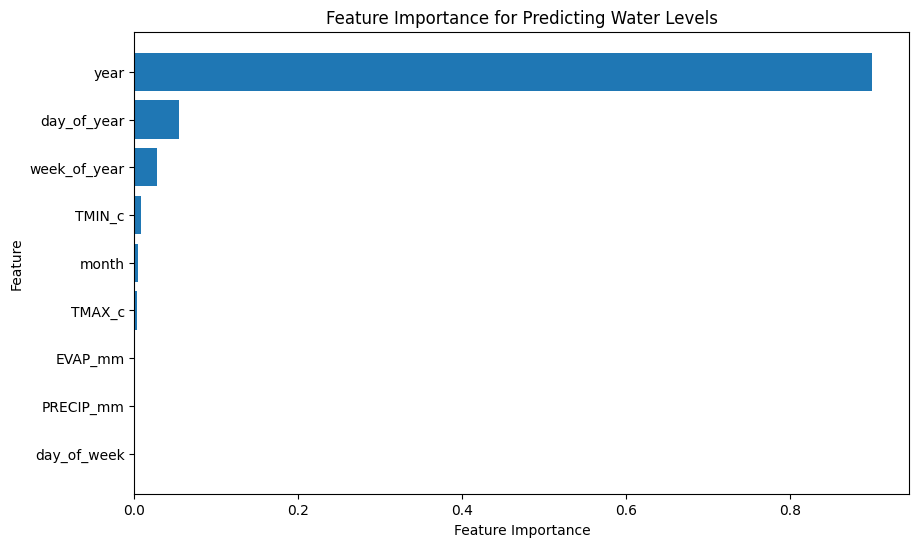

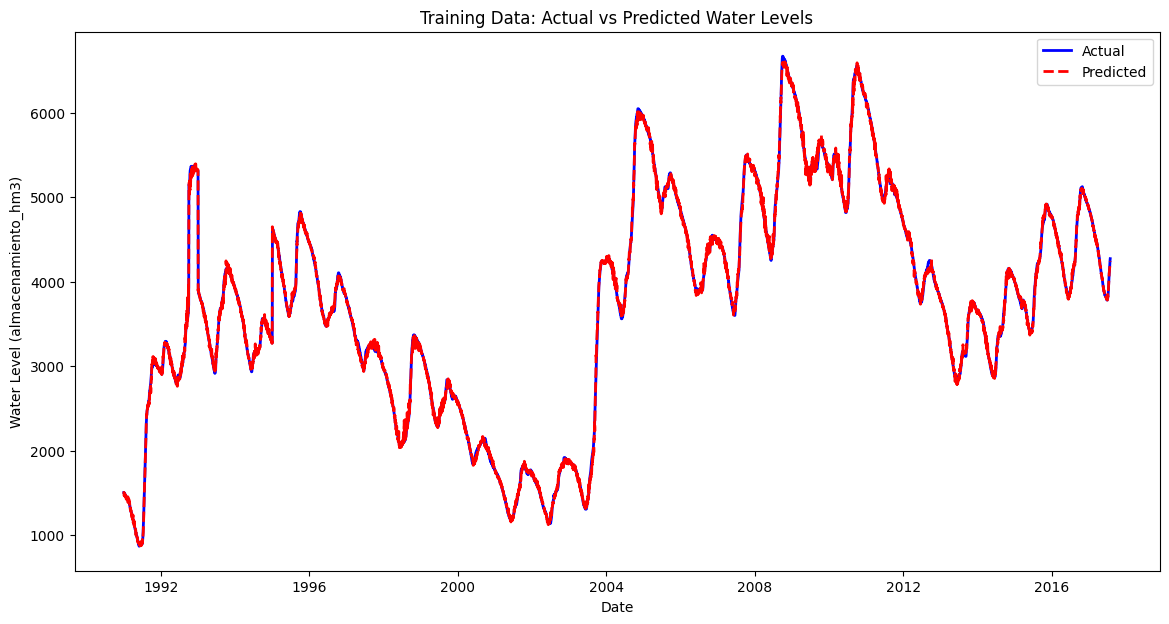

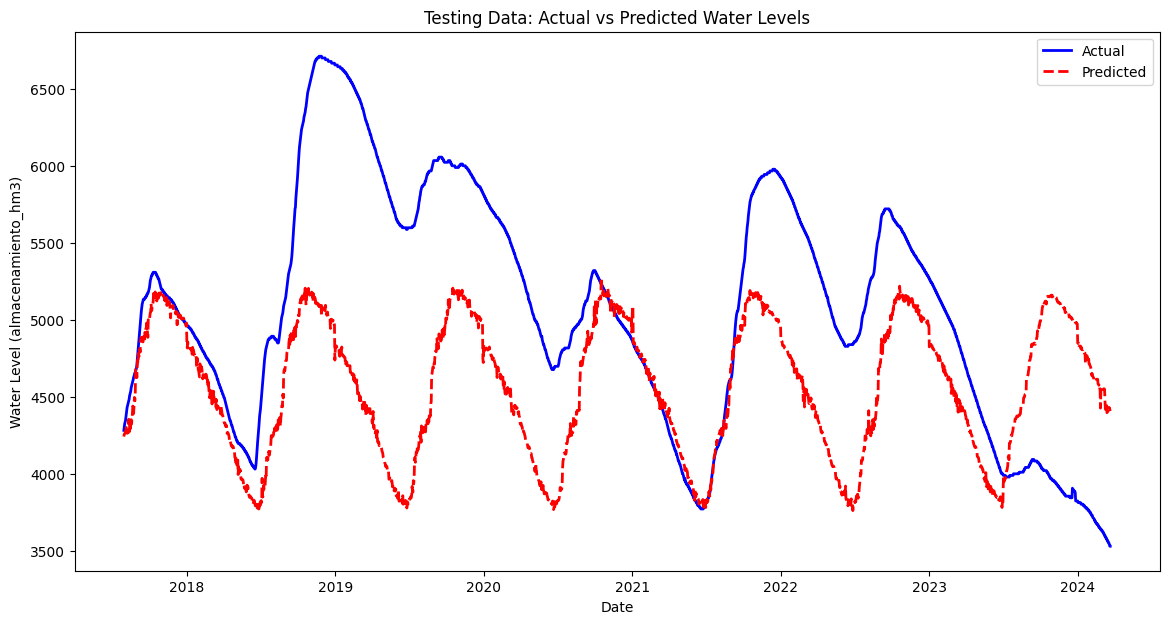

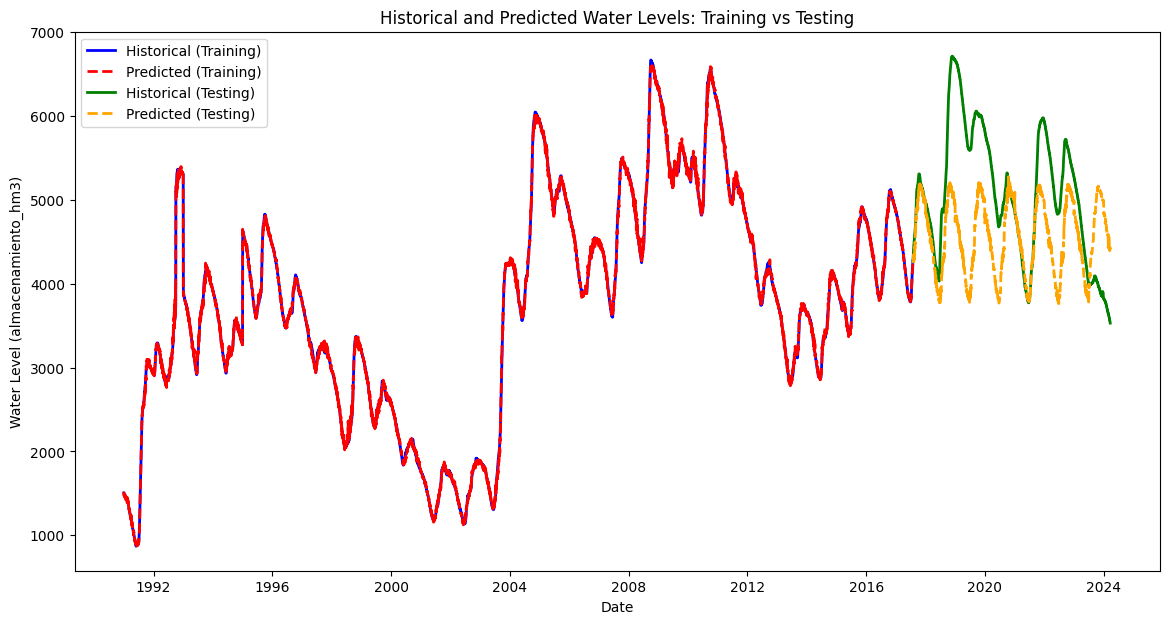

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/ML/final_project/data/merged_data.csv'
data = pd.read_csv(file_path)
#data = merged_data # already in environment

# Convert the 'fecha' column to datetime format
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')

# Extract additional temporal features
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day_of_year'] = data['fecha'].dt.dayofyear
data['day_of_week'] = data['fecha'].dt.dayofweek
data['week_of_year'] = data['fecha'].dt.isocalendar().week

# Define feature columns and target variable
features = ['PRECIP_mm', 'EVAP_mm', 'TMAX_c', 'TMIN_c', 'year', 'month', 'day_of_year', 'day_of_week', 'week_of_year']
target = 'almacenamiento_hm3'

# Split the data into training and testing sets based on the date
split_date = data['fecha'].quantile(0.8)
train_data = data[data['fecha'] <= split_date]
test_data = data[data['fecha'] > split_date]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize the Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Training MAE: {train_mae}')
print(f'Training R²: {train_r2}')
print(f'Testing RMSE: {test_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing R²: {test_r2}')

# Feature importance
importance = best_model.feature_importances_
feature_names = features
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Water Levels')
plt.gca().invert_yaxis()
plt.show()

# Combine the original and predicted values for comparison
train_comparison_df = pd.DataFrame({'fecha': train_data['fecha'], 'actual': y_train, 'predicted': y_train_pred})
test_comparison_df = pd.DataFrame({'fecha': test_data['fecha'], 'actual': y_test, 'predicted': y_test_pred})

# Plot the actual vs predicted values for training data
plt.figure(figsize=(14, 7))
plt.plot(train_comparison_df['fecha'], train_comparison_df['actual'], label='Actual', color='blue', linewidth=2)
plt.plot(train_comparison_df['fecha'], train_comparison_df['predicted'], label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Training Data: Actual vs Predicted Water Levels')
plt.legend()
plt.show()

# Plot the actual vs predicted values for testing data
plt.figure(figsize=(14, 7))
plt.plot(test_comparison_df['fecha'], test_comparison_df['actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_comparison_df['predicted'], label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Testing Data: Actual vs Predicted Water Levels')
plt.legend()
plt.show()

# Plot all together: historical, training predictions, and testing predictions
plt.figure(figsize=(14, 7))
plt.plot(train_comparison_df['fecha'], train_comparison_df['actual'], label='Historical (Training)', color='blue', linewidth=2)
plt.plot(train_comparison_df['fecha'], train_comparison_df['predicted'], label='Predicted (Training)', color='red', linestyle='--', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_comparison_df['actual'], label='Historical (Testing)', color='green', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_comparison_df['predicted'], label='Predicted (Testing)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Historical and Predicted Water Levels: Training vs Testing')
plt.legend()
plt.show()


Now, a bit more visualization.

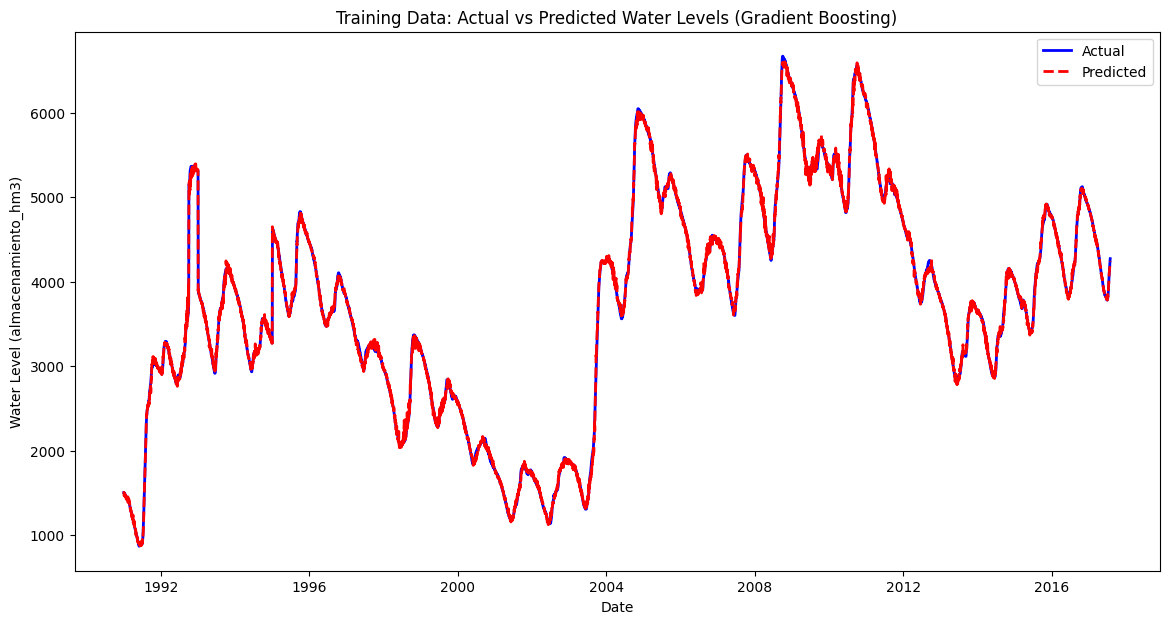

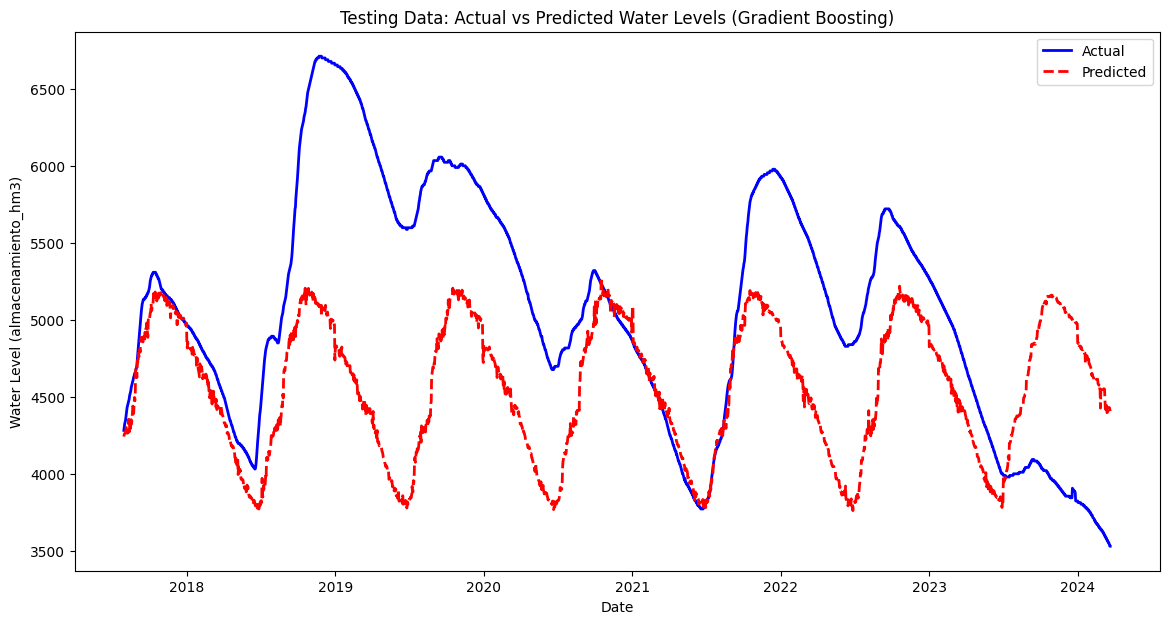

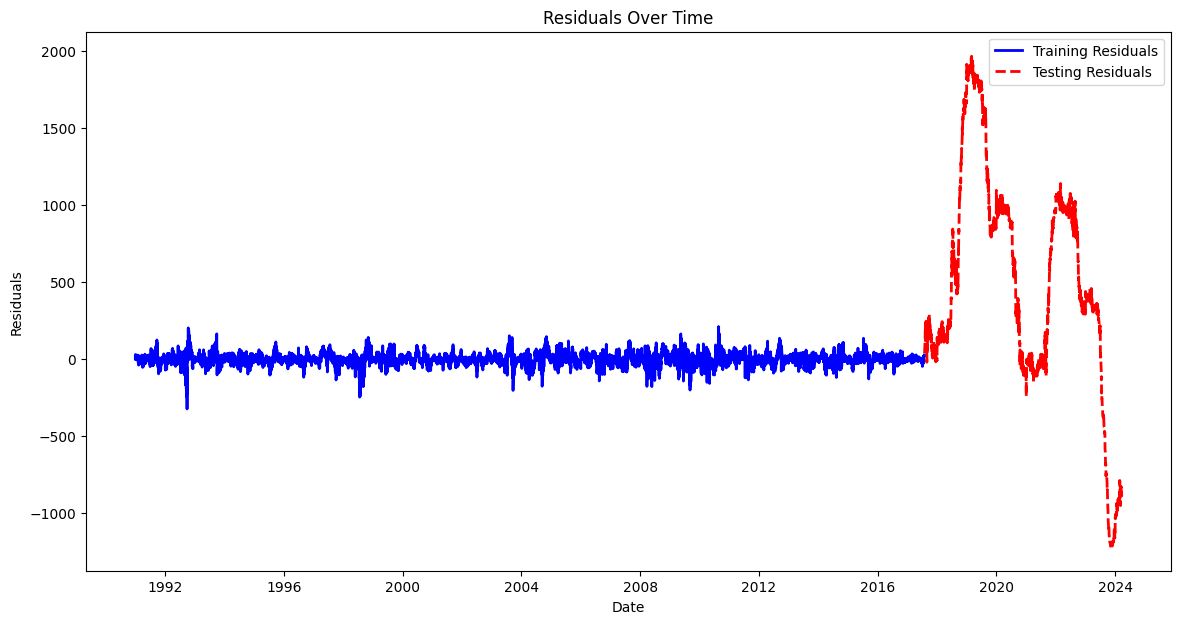

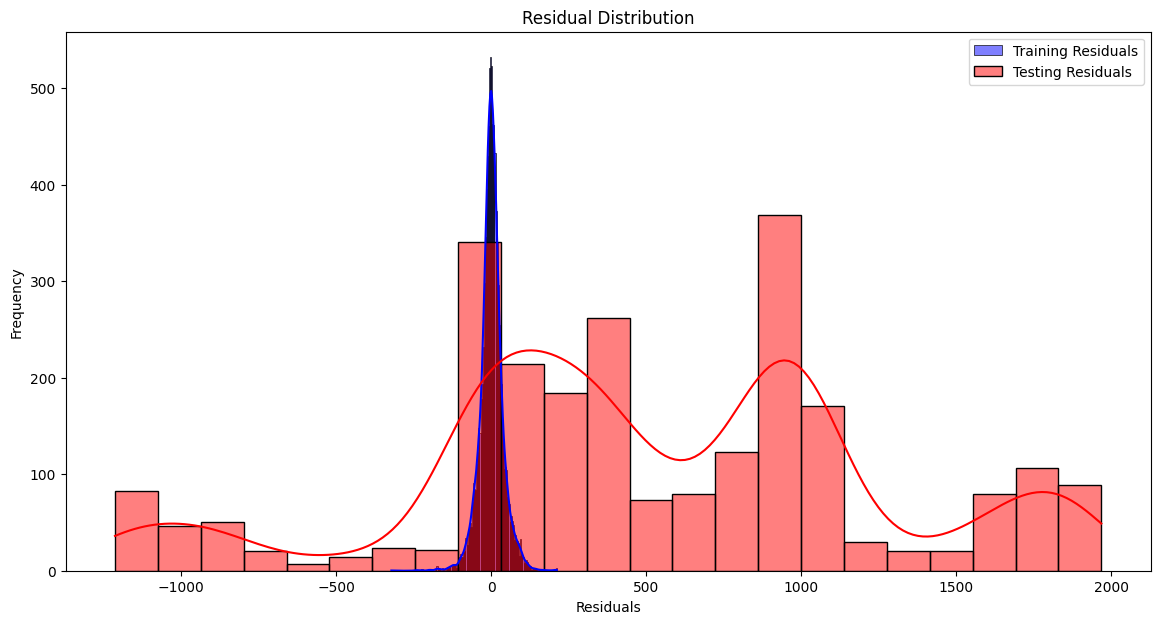

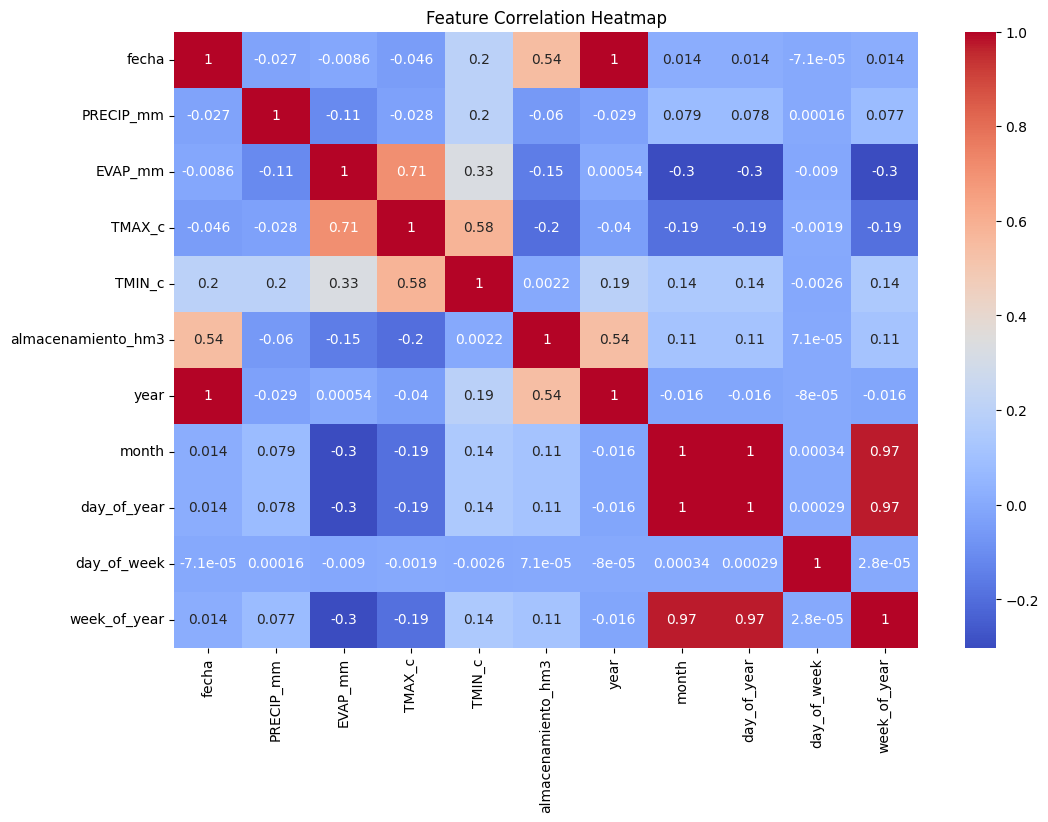

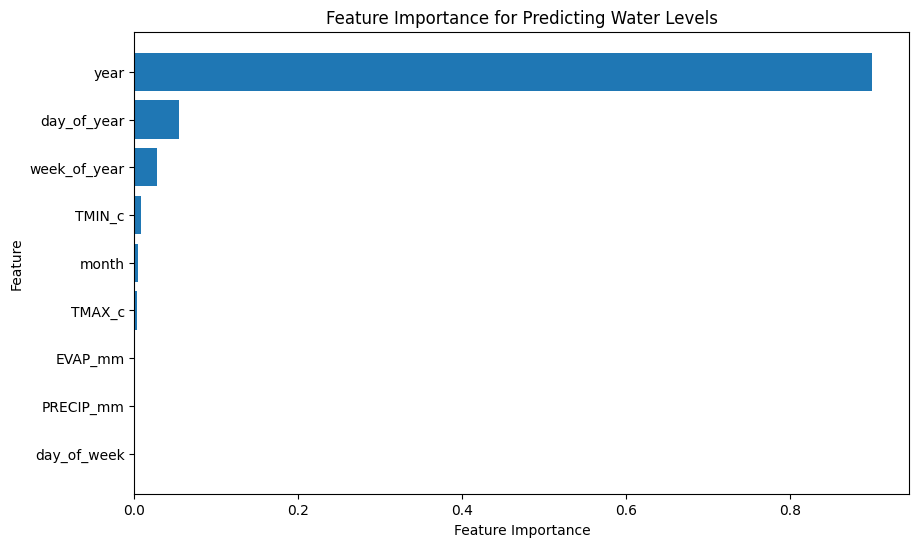

In [ ]:
import seaborn as sns

# Ensure the lengths of the data match
assert len(train_comparison_df) == len(y_train_pred), "Length mismatch between training data and predictions."
assert len(test_comparison_df) == len(y_test_pred), "Length mismatch between testing data and predictions."

# Time Series Plots
def plot_time_series(data, actual, predicted, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['fecha'], actual, label='Actual', color='blue', linewidth=2)
    plt.plot(data['fecha'], predicted, label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Water Level (almacenamiento_hm3)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot original and predicted values for training data
plot_time_series(train_comparison_df, train_comparison_df['actual'], train_comparison_df['predicted'], 'Training Data: Actual vs Predicted Water Levels (Gradient Boosting)')

# Plot original and predicted values for testing data
plot_time_series(test_comparison_df, test_comparison_df['actual'], test_comparison_df['predicted'], 'Testing Data: Actual vs Predicted Water Levels (Gradient Boosting)')

# Error Analysis
train_residuals = train_comparison_df['actual'] - train_comparison_df['predicted']
test_residuals = test_comparison_df['actual'] - test_comparison_df['predicted']

plt.figure(figsize=(14, 7))
plt.plot(train_comparison_df['fecha'], train_residuals, label='Training Residuals', color='blue', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_residuals, label='Testing Residuals', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.show()

# Residual Distribution
plt.figure(figsize=(14, 7))
sns.histplot(train_residuals, kde=True, color='blue', label='Training Residuals')
sns.histplot(test_residuals, kde=True, color='red', label='Testing Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Water Levels')
plt.gca().invert_yaxis()
plt.show()



The results are as expected. It is time to improve them by performing feature engineering (thanks to the understanding of the problem and the model to be explored) to add a 1-day lag feature for 'almacenamiento_hm3'.

Mounted at /content/drive
Training RMSE: 13.962864858290775
Training MAE: 7.2964678128340354
Training R²: 0.9998855864330669
Testing RMSE: 32.49031964000763
Testing MAE: 16.22617460841331
Testing R²: 0.9982443665706884


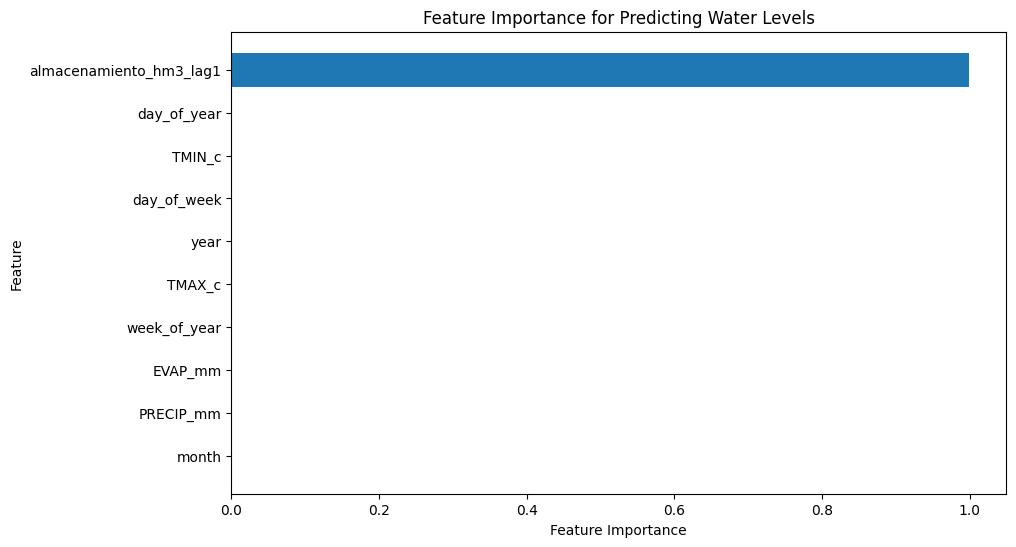

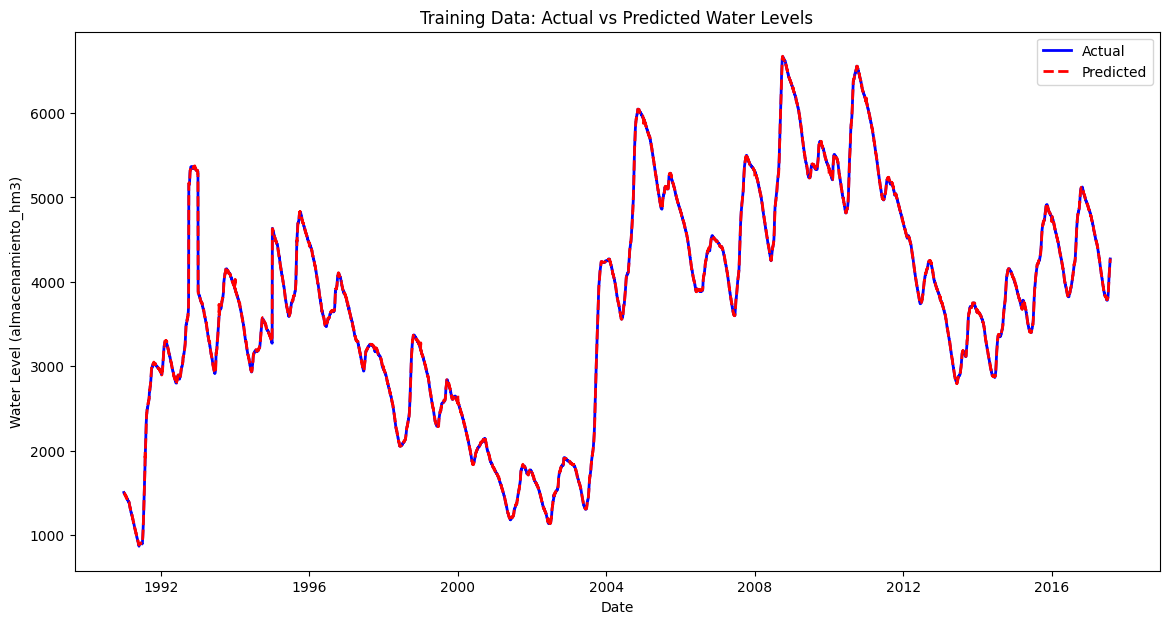

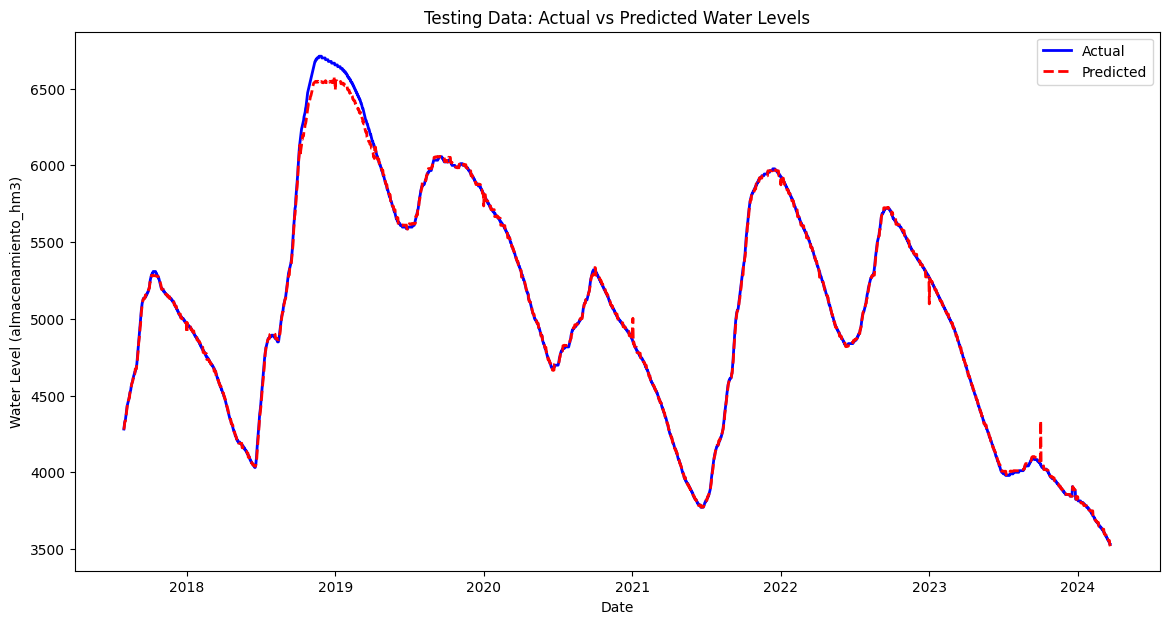

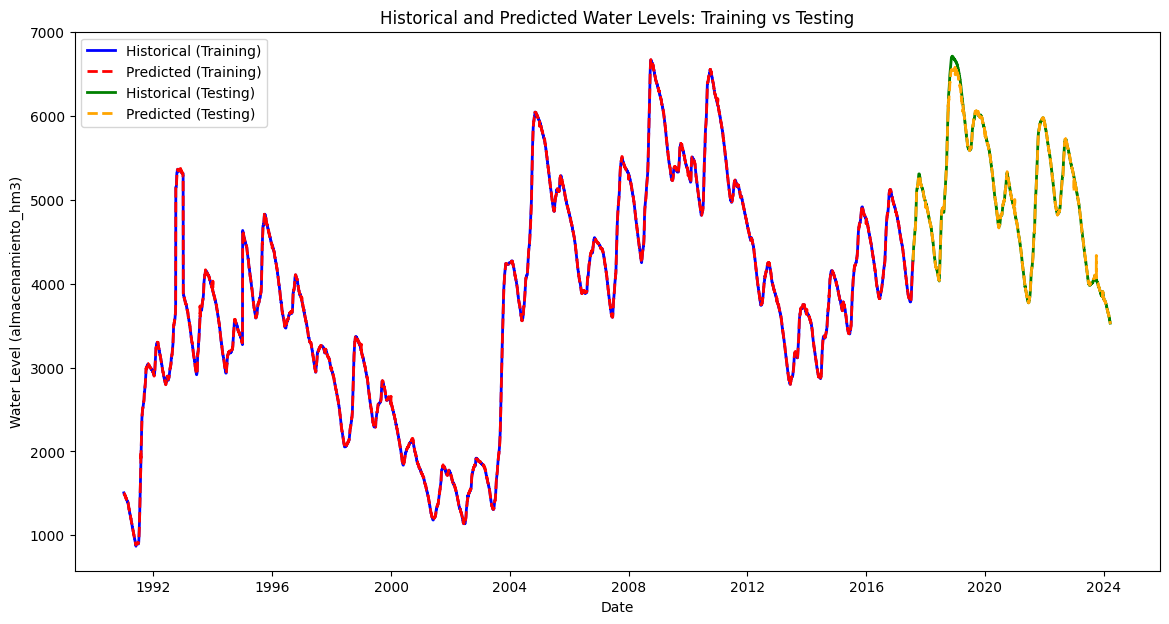

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/ML/final_project/data/merged_data.csv'
data = pd.read_csv(file_path)
#data = merged_data # already in environment

# Convert the 'fecha' column to datetime format
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')

# Extract additional temporal features
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day_of_year'] = data['fecha'].dt.dayofyear
data['day_of_week'] = data['fecha'].dt.dayofweek
data['week_of_year'] = data['fecha'].dt.isocalendar().week

# Create a 1-day lag feature for 'almacenamiento_hm3'
data['almacenamiento_hm3_lag1'] = data['almacenamiento_hm3'].shift(1)

# Drop rows with missing values due to lagging
data = data.dropna()

# Define feature columns and target variable
features = ['PRECIP_mm', 'EVAP_mm', 'TMAX_c', 'TMIN_c', 'year', 'month', 'day_of_year', 'day_of_week', 'week_of_year', 'almacenamiento_hm3_lag1']
target = 'almacenamiento_hm3'

# Split the data into training and testing sets based on the date
split_date = data['fecha'].quantile(0.8)
train_data = data[data['fecha'] <= split_date]
test_data = data[data['fecha'] > split_date]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize the Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Training MAE: {train_mae}')
print(f'Training R²: {train_r2}')
print(f'Testing RMSE: {test_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing R²: {test_r2}')

# Feature importance
importance = best_model.feature_importances_
feature_names = features
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Water Levels')
plt.gca().invert_yaxis()
plt.show()

# Combine the original and predicted values for comparison
train_comparison_df = pd.DataFrame({'fecha': train_data['fecha'], 'actual': y_train, 'predicted': y_train_pred})
test_comparison_df = pd.DataFrame({'fecha': test_data['fecha'], 'actual': y_test, 'predicted': y_test_pred})

# Plot the actual vs predicted values for training data
plt.figure(figsize=(14, 7))
plt.plot(train_comparison_df['fecha'], train_comparison_df['actual'], label='Actual', color='blue', linewidth=2)
plt.plot(train_comparison_df['fecha'], train_comparison_df['predicted'], label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Training Data: Actual vs Predicted Water Levels')
plt.legend()
plt.show()

# Plot the actual vs predicted values for testing data
plt.figure(figsize=(14, 7))
plt.plot(test_comparison_df['fecha'], test_comparison_df['actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_comparison_df['predicted'], label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Testing Data: Actual vs Predicted Water Levels')
plt.legend()
plt.show()

# Plot all together: historical, training predictions, and testing predictions
plt.figure(figsize=(14, 7))
plt.plot(train_comparison_df['fecha'], train_comparison_df['actual'], label='Historical (Training)', color='blue', linewidth=2)
plt.plot(train_comparison_df['fecha'], train_comparison_df['predicted'], label='Predicted (Training)', color='red', linestyle='--', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_comparison_df['actual'], label='Historical (Testing)', color='green', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_comparison_df['predicted'], label='Predicted (Testing)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Historical and Predicted Water Levels: Training vs Testing')
plt.legend()
plt.show()


And finally, a bit more visualization.

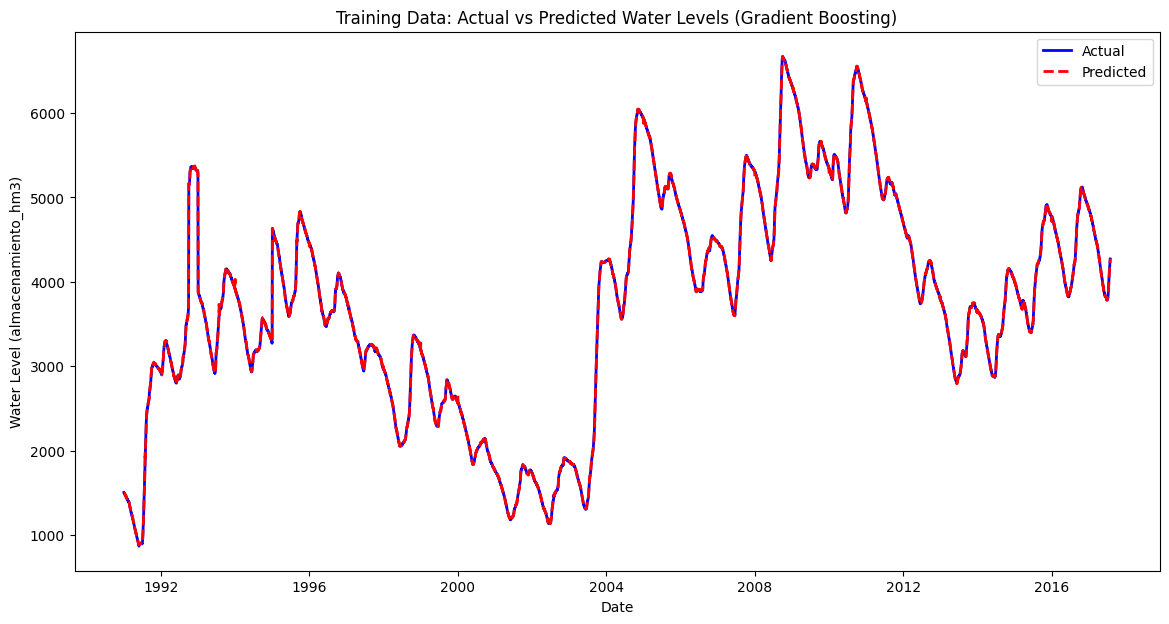

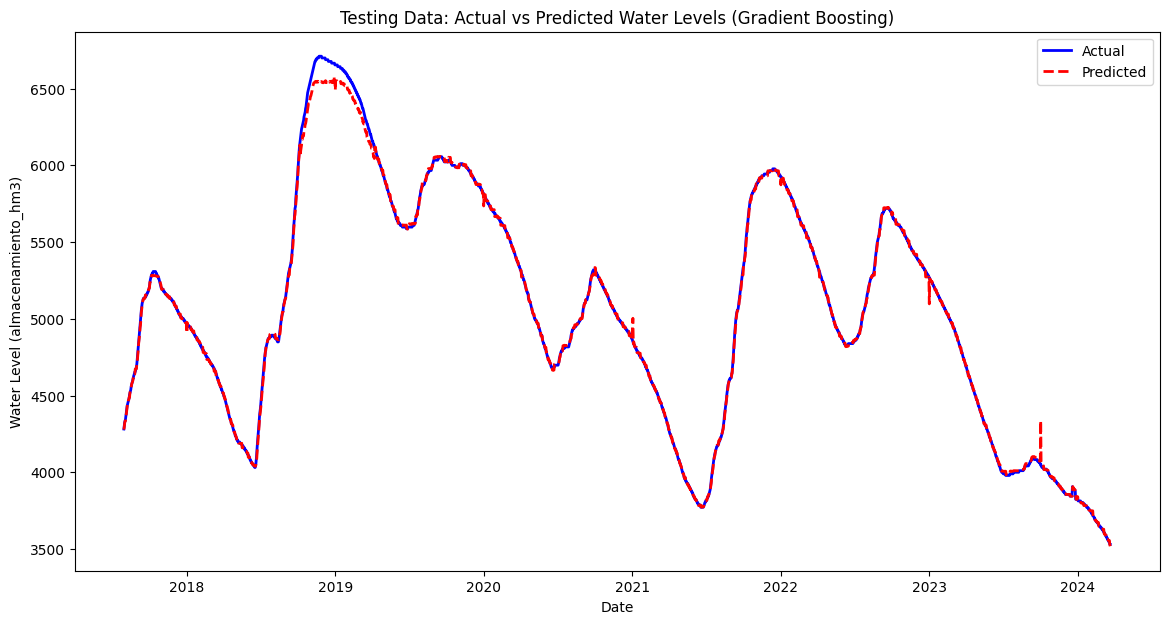

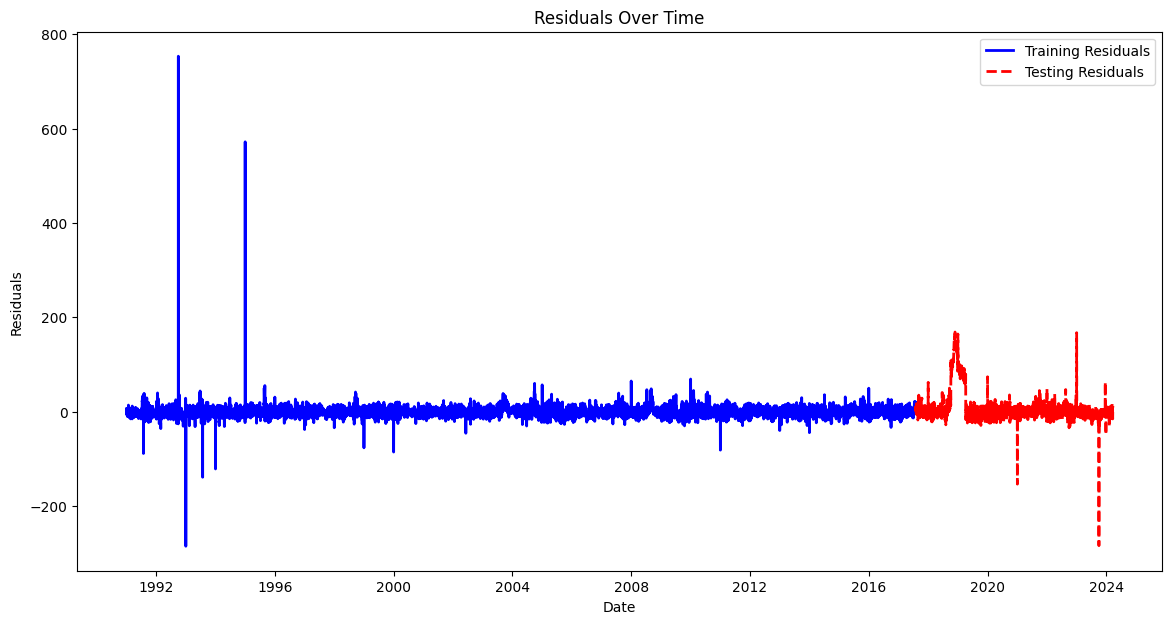

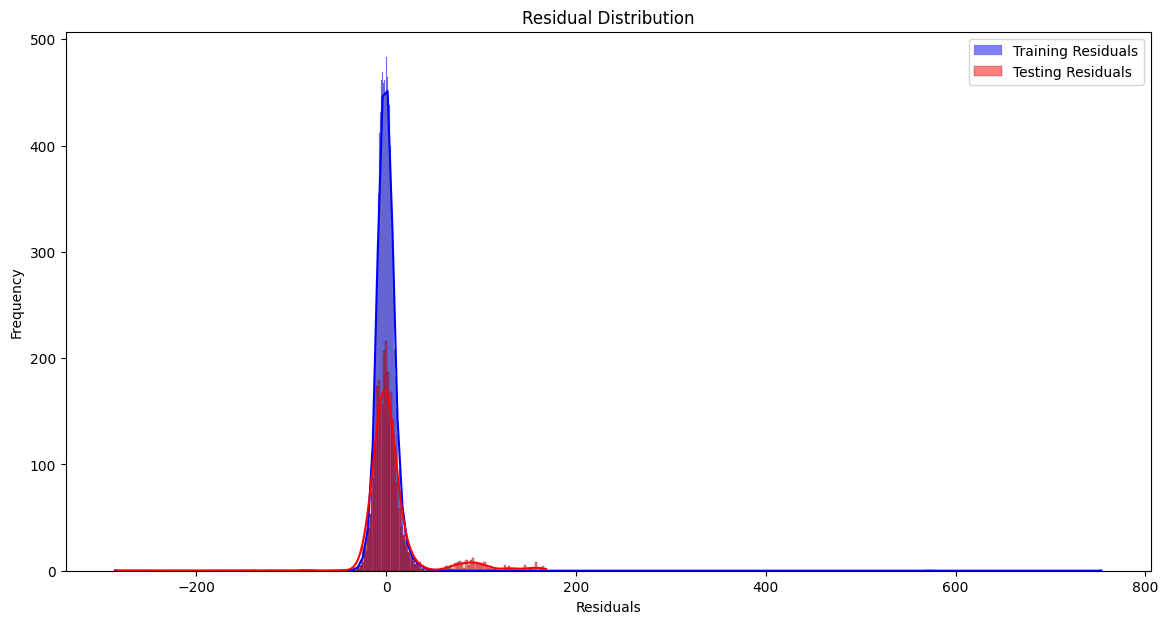

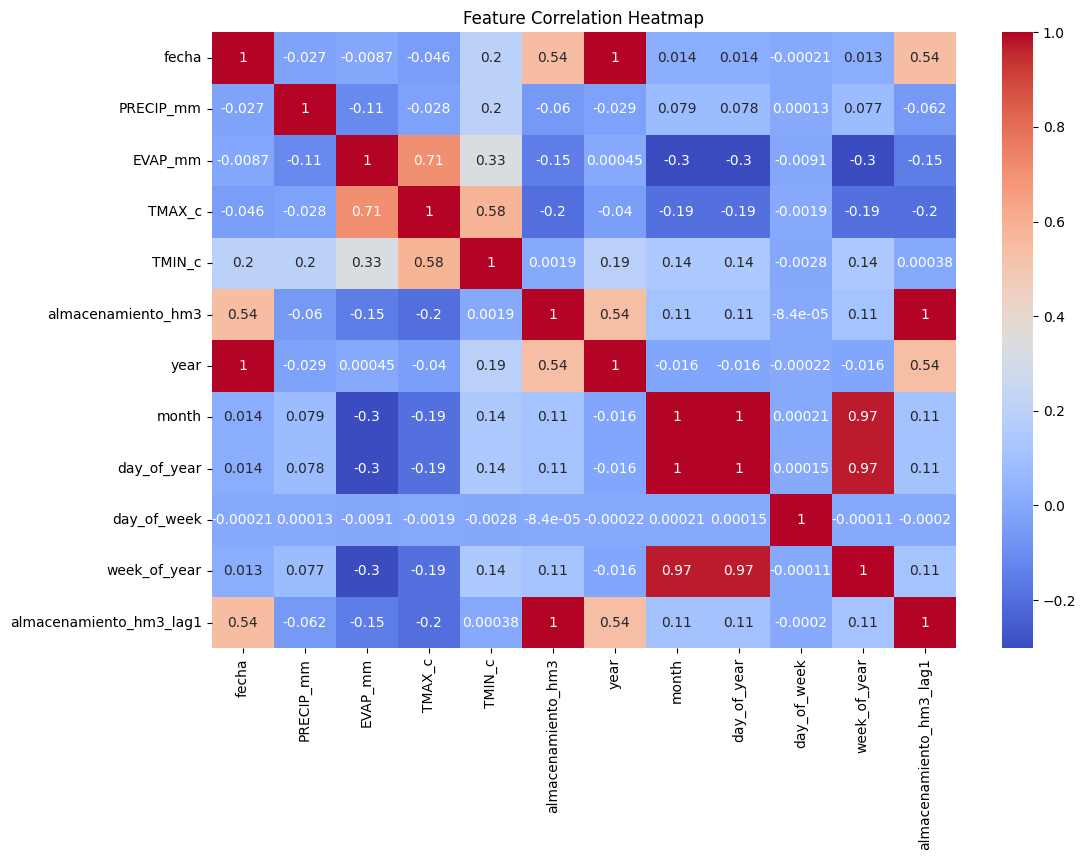

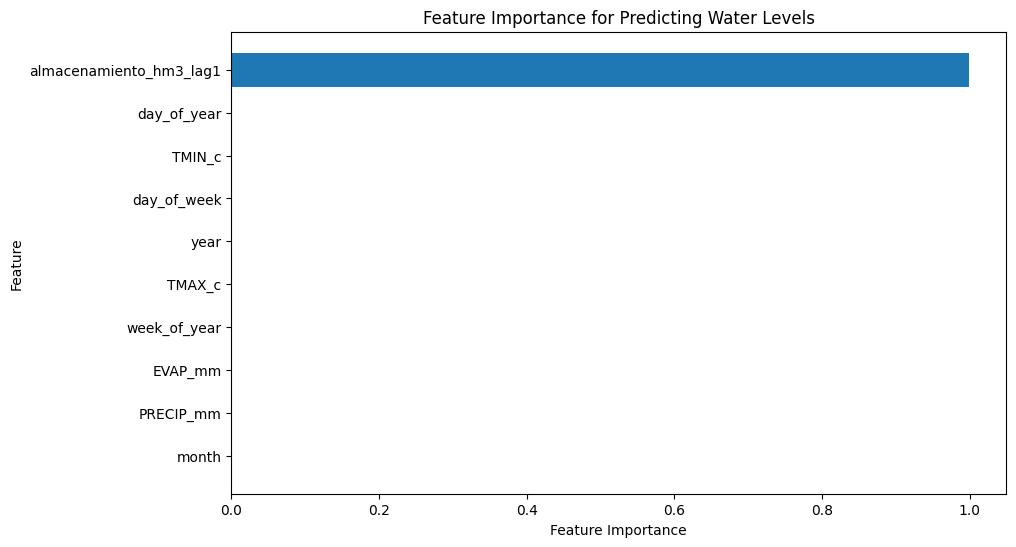

In [ ]:
import seaborn as sns

# Ensure the lengths of the data match
assert len(train_comparison_df) == len(y_train_pred), "Length mismatch between training data and predictions."
assert len(test_comparison_df) == len(y_test_pred), "Length mismatch between testing data and predictions."

# Time Series Plots
def plot_time_series(data, actual, predicted, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['fecha'], actual, label='Actual', color='blue', linewidth=2)
    plt.plot(data['fecha'], predicted, label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Water Level (almacenamiento_hm3)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot original and predicted values for training data
plot_time_series(train_comparison_df, train_comparison_df['actual'], train_comparison_df['predicted'], 'Training Data: Actual vs Predicted Water Levels (Gradient Boosting)')

# Plot original and predicted values for testing data
plot_time_series(test_comparison_df, test_comparison_df['actual'], test_comparison_df['predicted'], 'Testing Data: Actual vs Predicted Water Levels (Gradient Boosting)')

# Error Analysis
train_residuals = train_comparison_df['actual'] - train_comparison_df['predicted']
test_residuals = test_comparison_df['actual'] - test_comparison_df['predicted']

plt.figure(figsize=(14, 7))
plt.plot(train_comparison_df['fecha'], train_residuals, label='Training Residuals', color='blue', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_residuals, label='Testing Residuals', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.show()

# Residual Distribution
plt.figure(figsize=(14, 7))
sns.histplot(train_residuals, kde=True, color='blue', label='Training Residuals')
sns.histplot(test_residuals, kde=True, color='red', label='Testing Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Water Levels')
plt.gca().invert_yaxis()
plt.show()


Thus, by providing the appropriate features to our model, we were able to reduce the error in our predictions and achieve very acceptable results in both training and testing.

It's time to try a more direct and theoretically more suitable approach for this type of problem, an LSTM (Long Short-Term Memory) network. However, initially without lag features.

Mounted at /content/drive
Epoch 1/10
242/242 [==============================] - 20s 56ms/step - loss: 0.0437 - val_loss: 0.2126
Epoch 2/10
242/242 [==============================] - 11s 47ms/step - loss: 0.0245 - val_loss: 0.0761
Epoch 3/10
242/242 [==============================] - 12s 50ms/step - loss: 0.0143 - val_loss: 0.0757
Epoch 4/10
242/242 [==============================] - 13s 55ms/step - loss: 0.0131 - val_loss: 0.1177
Epoch 5/10
242/242 [==============================] - 13s 55ms/step - loss: 0.0106 - val_loss: 0.0829
Epoch 6/10
242/242 [==============================] - 12s 50ms/step - loss: 0.0101 - val_loss: 0.1090
Epoch 7/10
242/242 [==============================] - 14s 60ms/step - loss: 0.0100 - val_loss: 0.1053
Epoch 8/10
242/242 [==============================] - 11s 45ms/step - loss: 0.0096 - val_loss: 0.0945
Epoch 9/10
242/242 [==============================] - 12s 49ms/step - loss: 0.0087 - val_loss: 0.0828
Epoch 10/10
75/75 [==============================] - 1s 

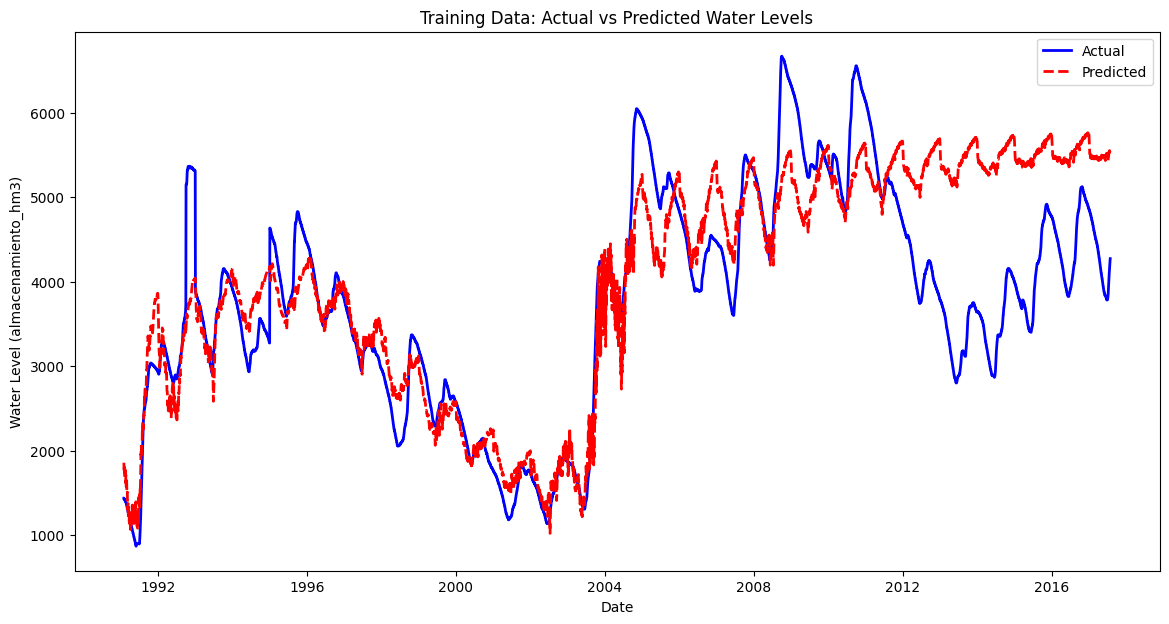

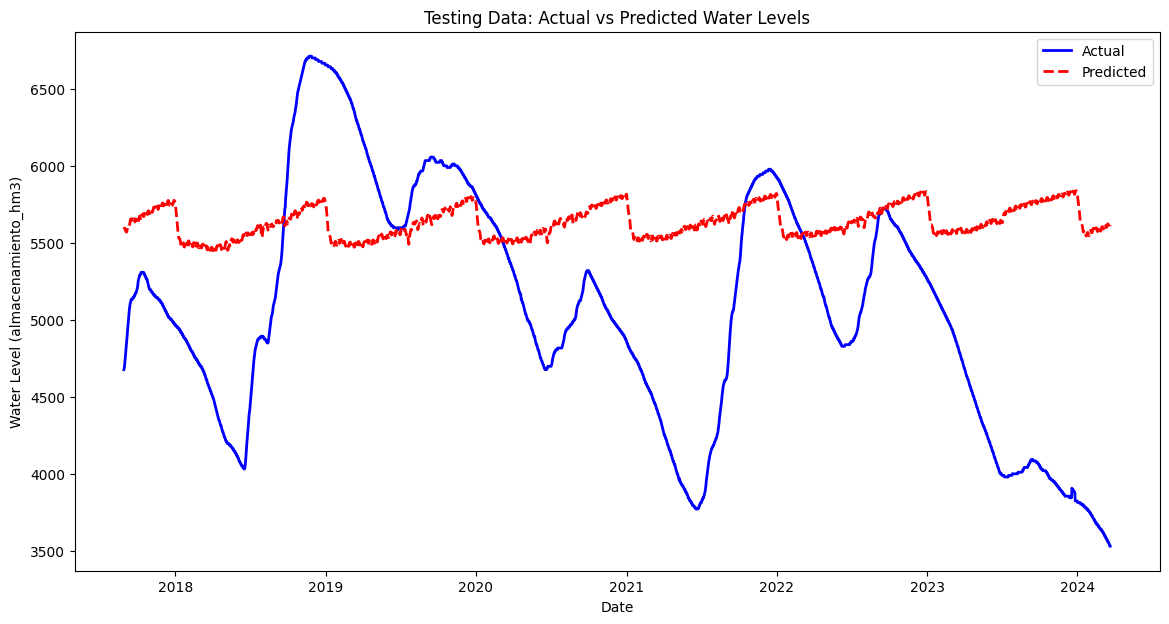

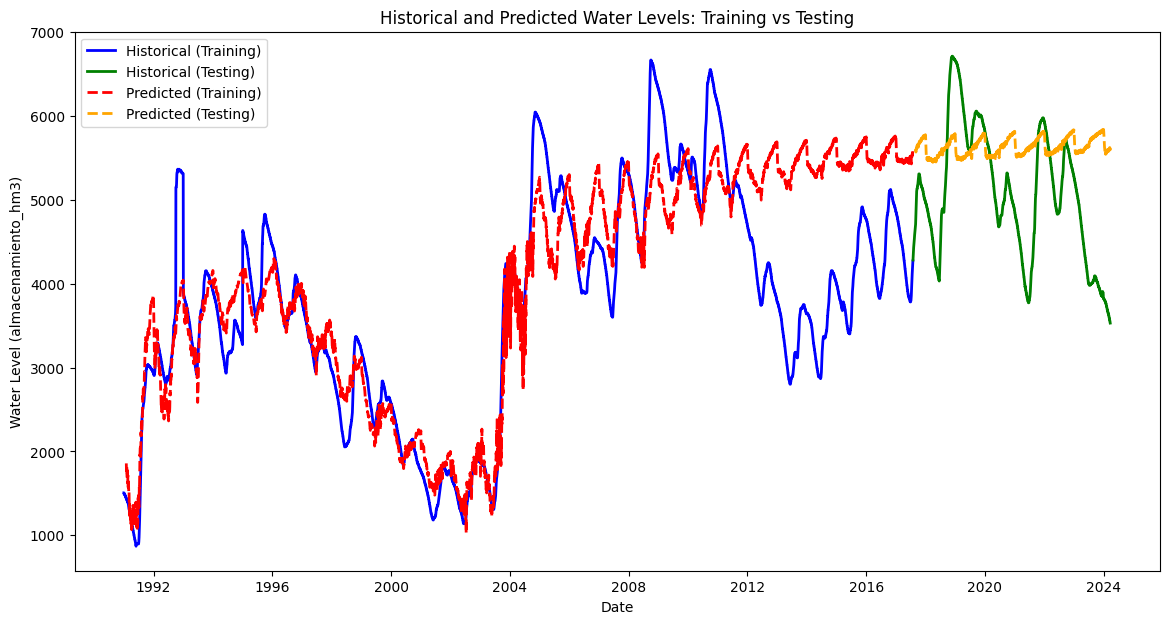

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
file_path = '/content/drive/My Drive/ML/final_project/data/merged_data.csv'
data = pd.read_csv(file_path)
#data = merged_data # already in environment

# Convert the 'fecha' column to datetime format
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')

# Extract additional temporal features
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day_of_year'] = data['fecha'].dt.dayofyear
data['day_of_week'] = data['fecha'].dt.dayofweek
data['week_of_year'] = data['fecha'].dt.isocalendar().week

# Define feature columns and target variable
features = ['PRECIP_mm', 'EVAP_mm', 'TMAX_c', 'TMIN_c', 'year', 'month', 'day_of_year', 'day_of_week', 'week_of_year']
target = 'almacenamiento_hm3'

# Split the data into training and testing sets based on the date
split_date = data['fecha'].quantile(0.8)
train_data = data[data['fecha'] <= split_date]
test_data = data[data['fecha'] > split_date]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data[features + [target]])
test_data_scaled = scaler.transform(test_data[features + [target]])

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

seq_length = 30  # Use 30 days of historical data to predict the next day
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert scaling for predictions and actual values
train_predictions = scaler.inverse_transform(np.concatenate((train_data_scaled[seq_length:, :-1], train_predictions), axis=1))[:, -1]
y_train_actual = scaler.inverse_transform(train_data_scaled[seq_length:])[:, -1]
test_predictions = scaler.inverse_transform(np.concatenate((test_data_scaled[seq_length:, :-1], test_predictions), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(test_data_scaled[seq_length:])[:, -1]

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
train_mae = mean_absolute_error(y_train_actual, train_predictions)
test_mae = mean_absolute_error(y_test_actual, test_predictions)
train_r2 = r2_score(y_train_actual, train_predictions)
test_r2 = r2_score(y_test_actual, test_predictions)

print(f'Training RMSE: {train_rmse}')
print(f'Training MAE: {train_mae}')
print(f'Training R²: {train_r2}')
print(f'Testing RMSE: {test_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing R²: {test_r2}')

# Plot the actual vs predicted values for training data
plt.figure(figsize=(14, 7))
plt.plot(train_data['fecha'][seq_length:], y_train_actual, label='Actual', color='blue', linewidth=2)
plt.plot(train_data['fecha'][seq_length:], train_predictions, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Training Data: Actual vs Predicted Water Levels')
plt.legend()
plt.show()

# Plot the actual vs predicted values for testing data
plt.figure(figsize=(14, 7))
plt.plot(test_data['fecha'][seq_length:], y_test_actual, label='Actual', color='blue', linewidth=2)
plt.plot(test_data['fecha'][seq_length:], test_predictions, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Testing Data: Actual vs Predicted Water Levels')
plt.legend()
plt.show()

# Plot all together: historical, training predictions, and testing predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data['fecha'], train_data[target], label='Historical (Training)', color='blue', linewidth=2)
plt.plot(test_data['fecha'], test_data[target], label='Historical (Testing)', color='green', linewidth=2)
plt.plot(train_data['fecha'][seq_length:], train_predictions, label='Predicted (Training)', color='red', linestyle='--', linewidth=2)
plt.plot(test_data['fecha'][seq_length:], test_predictions, label='Predicted (Testing)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Historical and Predicted Water Levels: Training vs Testing')
plt.legend()
plt.show()


Now, a bit more visualization.

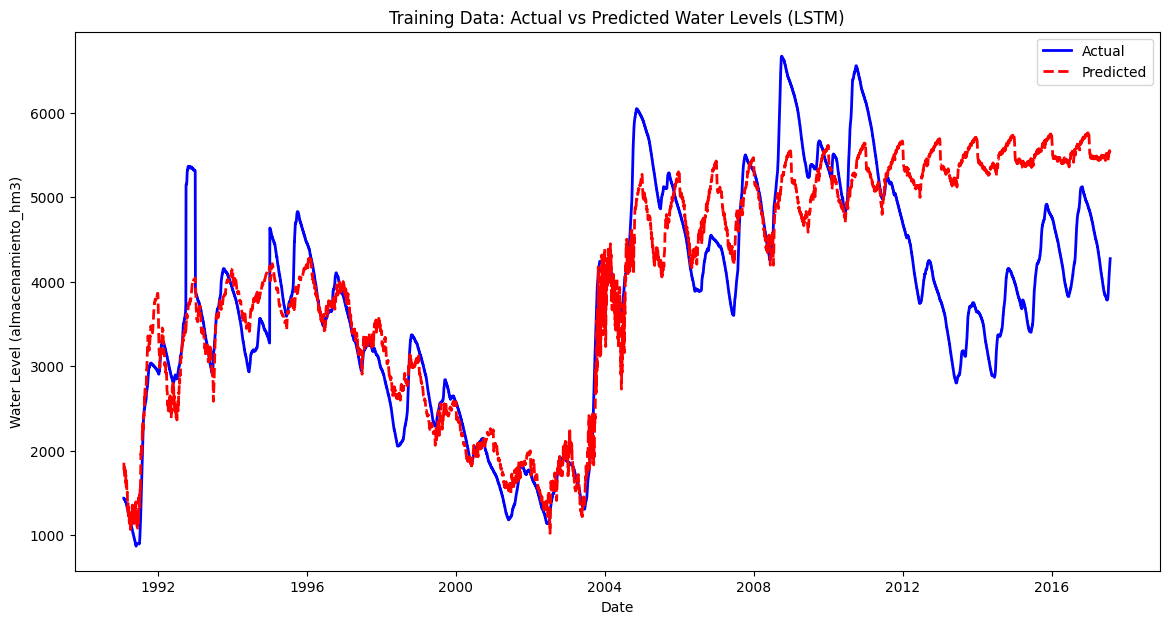

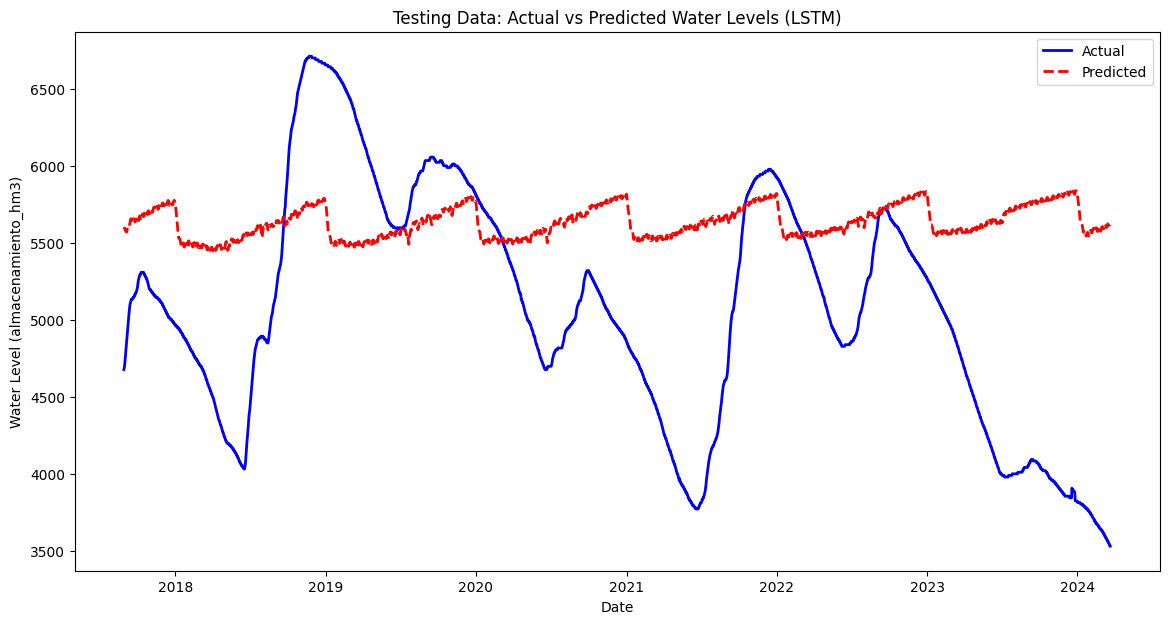

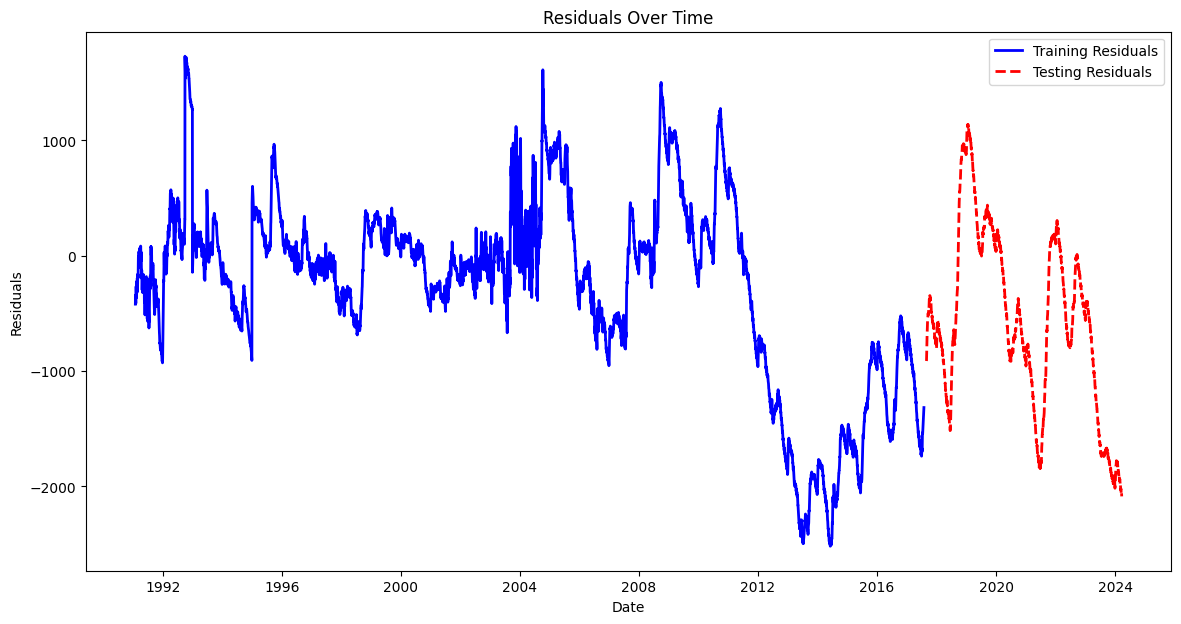

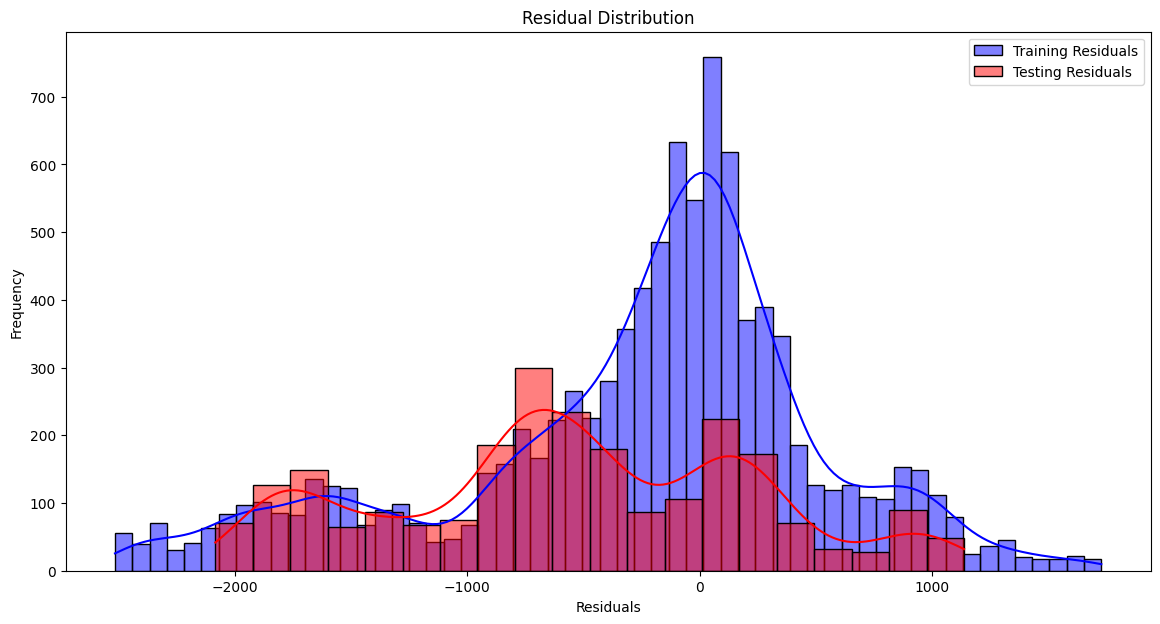

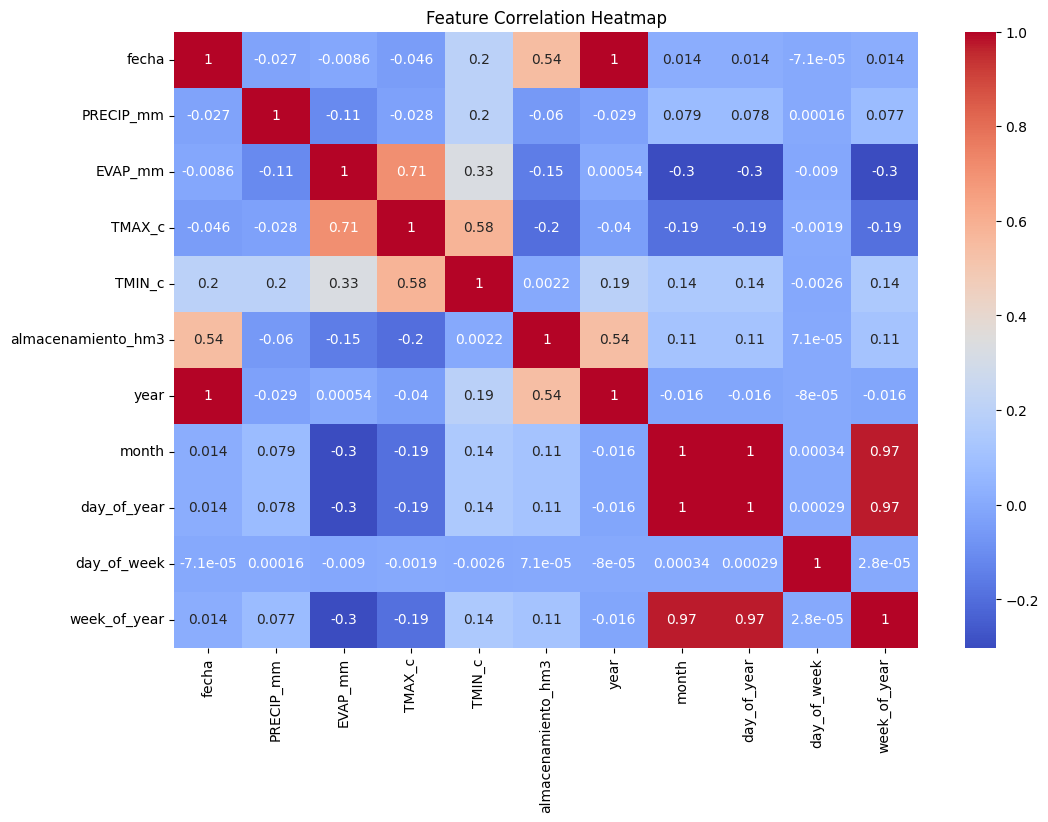

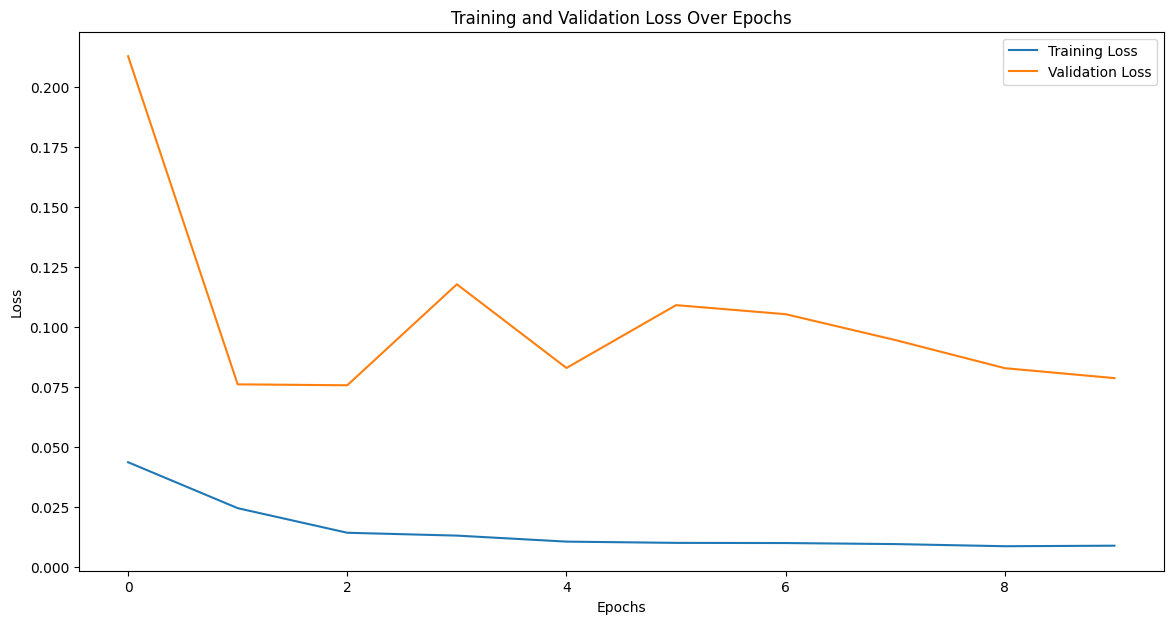

In [ ]:
import seaborn as sns

# Ensure the lengths of the data match
train_comparison_df = pd.DataFrame({'fecha': train_data['fecha'][seq_length:], 'actual': y_train_actual, 'predicted': train_predictions})
test_comparison_df = pd.DataFrame({'fecha': test_data['fecha'][seq_length:], 'actual': y_test_actual, 'predicted': test_predictions})

# Time Series Plots
def plot_time_series(data, actual, predicted, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['fecha'], actual, label='Actual', color='blue', linewidth=2)
    plt.plot(data['fecha'], predicted, label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Water Level (almacenamiento_hm3)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot original and predicted values for training data
plot_time_series(train_comparison_df, y_train_actual, train_predictions, 'Training Data: Actual vs Predicted Water Levels (LSTM)')

# Plot original and predicted values for testing data
plot_time_series(test_comparison_df, y_test_actual, test_predictions, 'Testing Data: Actual vs Predicted Water Levels (LSTM)')

# Error Analysis
train_residuals = y_train_actual - train_predictions
test_residuals = y_test_actual - test_predictions

plt.figure(figsize=(14, 7))
plt.plot(train_comparison_df['fecha'], train_residuals, label='Training Residuals', color='blue', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_residuals, label='Testing Residuals', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.show()

# Residual Distribution
plt.figure(figsize=(14, 7))
sns.histplot(train_residuals, kde=True, color='blue', label='Training Residuals')
sns.histplot(test_residuals, kde=True, color='red', label='Testing Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Training and Validation Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


For now, the results are not acceptable, highlighting the need to add more meaningful features (again, add a 1-day lag feature for 'almacenamiento_hm3').

Mounted at /content/drive
Epoch 1/10
242/242 [==============================] - 18s 50ms/step - loss: 0.0094 - val_loss: 4.7818e-04
Epoch 2/10
242/242 [==============================] - 11s 44ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 3/10
242/242 [==============================] - 12s 51ms/step - loss: 0.0019 - val_loss: 4.0770e-04
Epoch 4/10
242/242 [==============================] - 12s 50ms/step - loss: 0.0017 - val_loss: 5.0605e-05
Epoch 5/10
242/242 [==============================] - 13s 53ms/step - loss: 0.0016 - val_loss: 8.9154e-05
Epoch 6/10
242/242 [==============================] - 11s 46ms/step - loss: 0.0014 - val_loss: 1.2716e-04
Epoch 7/10
242/242 [==============================] - 13s 54ms/step - loss: 0.0014 - val_loss: 4.2338e-04
Epoch 8/10
242/242 [==============================] - 14s 56ms/step - loss: 0.0013 - val_loss: 4.5534e-05
Epoch 9/10
242/242 [==============================] - 14s 57ms/step - loss: 0.0011 - val_loss: 5.2063e-05
Epoch 10/10
75/75 [=====

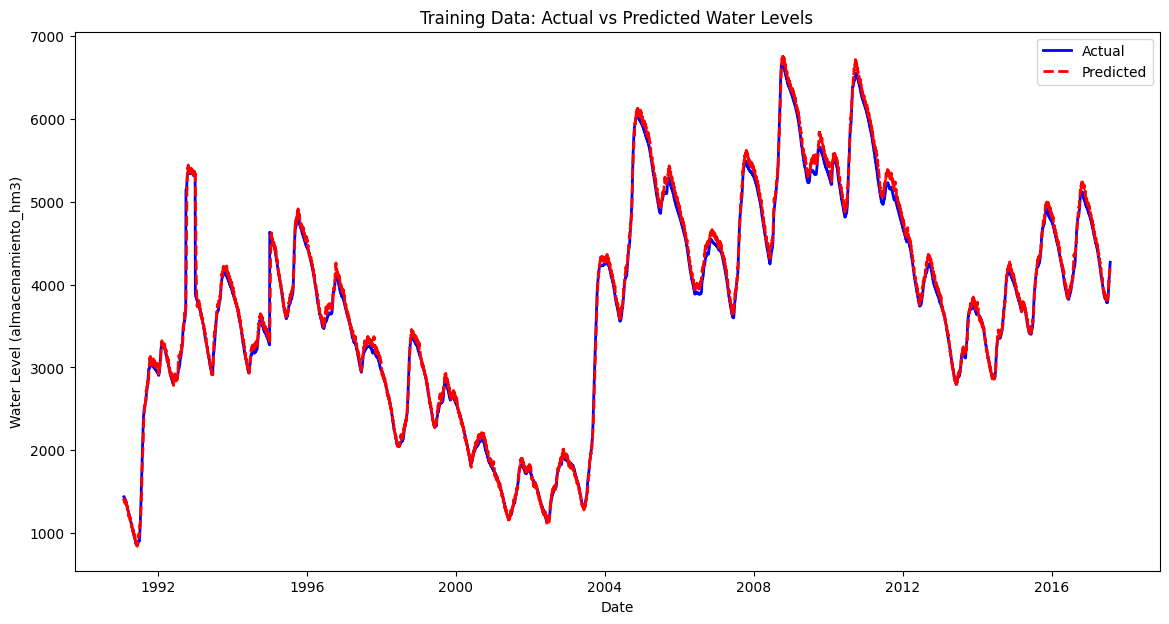

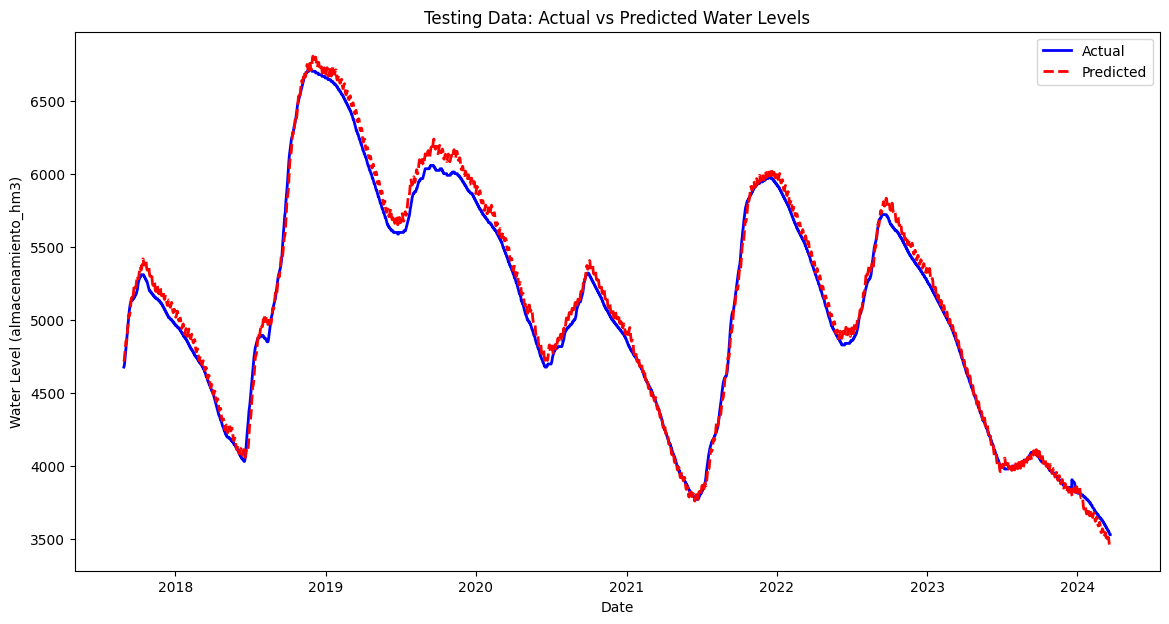

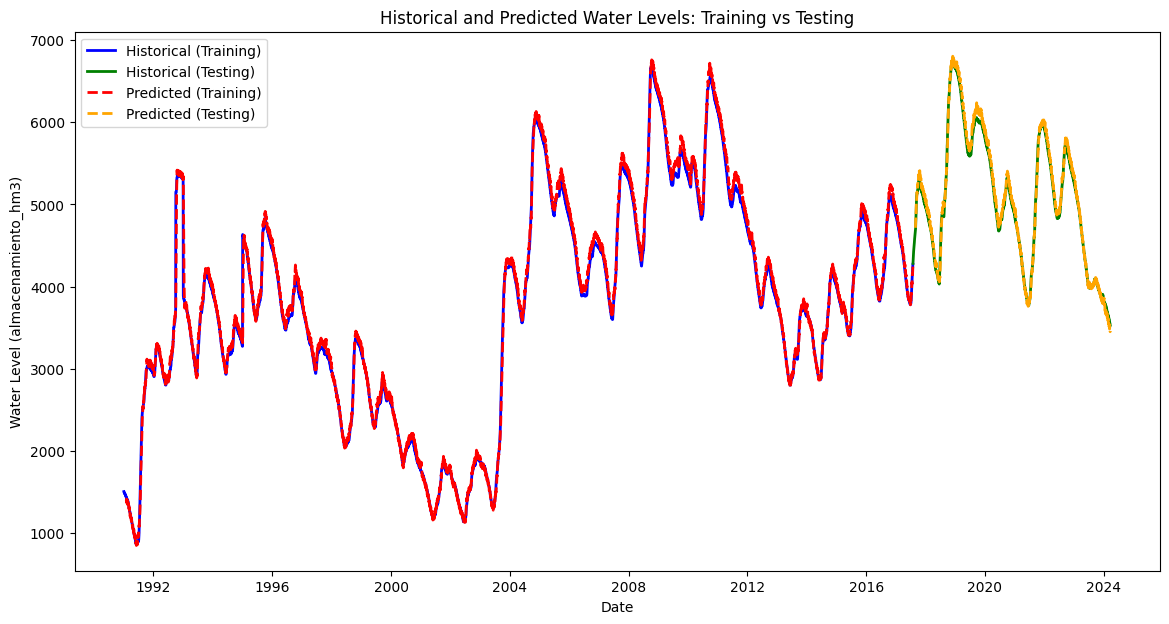

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
file_path = '/content/drive/My Drive/ML/final_project/data/merged_data.csv'
data = pd.read_csv(file_path)
#data = merged_data # already in environment

# Convert the 'fecha' column to datetime format
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')

# Extract additional temporal features
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day_of_year'] = data['fecha'].dt.dayofyear
data['day_of_week'] = data['fecha'].dt.dayofweek
data['week_of_year'] = data['fecha'].dt.isocalendar().week

# Create a 1-day lag feature for 'almacenamiento_hm3'
data['almacenamiento_hm3_lag1'] = data['almacenamiento_hm3'].shift(1)

# Drop rows with missing values due to lagging
data = data.dropna()

# Define feature columns and target variable
features = ['PRECIP_mm', 'EVAP_mm', 'TMAX_c', 'TMIN_c', 'year', 'month', 'day_of_year', 'day_of_week', 'week_of_year', 'almacenamiento_hm3_lag1']
target = 'almacenamiento_hm3'

# Split the data into training and testing sets based on the date
split_date = data['fecha'].quantile(0.8)
train_data = data[data['fecha'] <= split_date]
test_data = data[data['fecha'] > split_date]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data[features + [target]])
test_data_scaled = scaler.transform(test_data[features + [target]])

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

seq_length = 30  # Use 30 days of historical data to predict the next day
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert scaling for predictions and actual values
train_predictions = scaler.inverse_transform(np.concatenate((train_data_scaled[seq_length:, :-1], train_predictions), axis=1))[:, -1]
y_train_actual = scaler.inverse_transform(train_data_scaled[seq_length:])[:, -1]
test_predictions = scaler.inverse_transform(np.concatenate((test_data_scaled[seq_length:, :-1], test_predictions), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(test_data_scaled[seq_length:])[:, -1]

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
train_mae = mean_absolute_error(y_train_actual, train_predictions)
test_mae = mean_absolute_error(y_test_actual, test_predictions)
train_r2 = r2_score(y_train_actual, train_predictions)
test_r2 = r2_score(y_test_actual, test_predictions)

print(f'Training RMSE: {train_rmse}')
print(f'Training MAE: {train_mae}')
print(f'Training R²: {train_r2}')
print(f'Testing RMSE: {test_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing R²: {test_r2}')

# Plot the actual vs predicted values for training data
plt.figure(figsize=(14, 7))
plt.plot(train_data['fecha'][seq_length:], y_train_actual, label='Actual', color='blue', linewidth=2)
plt.plot(train_data['fecha'][seq_length:], train_predictions, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Training Data: Actual vs Predicted Water Levels')
plt.legend()
plt.show()

# Plot the actual vs predicted values for testing data
plt.figure(figsize=(14, 7))
plt.plot(test_data['fecha'][seq_length:], y_test_actual, label='Actual', color='blue', linewidth=2)
plt.plot(test_data['fecha'][seq_length:], test_predictions, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Testing Data: Actual vs Predicted Water Levels')
plt.legend()
plt.show()

# Plot all together: historical, training predictions, and testing predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data['fecha'], train_data[target], label='Historical (Training)', color='blue', linewidth=2)
plt.plot(test_data['fecha'], test_data[target], label='Historical (Testing)', color='green', linewidth=2)
plt.plot(train_data['fecha'][seq_length:], train_predictions, label='Predicted (Training)', color='red', linestyle='--', linewidth=2)
plt.plot(test_data['fecha'][seq_length:], test_predictions, label='Predicted (Testing)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Water Level (almacenamiento_hm3)')
plt.title('Historical and Predicted Water Levels: Training vs Testing')
plt.legend()
plt.show()


And finally, a bit more visualization.

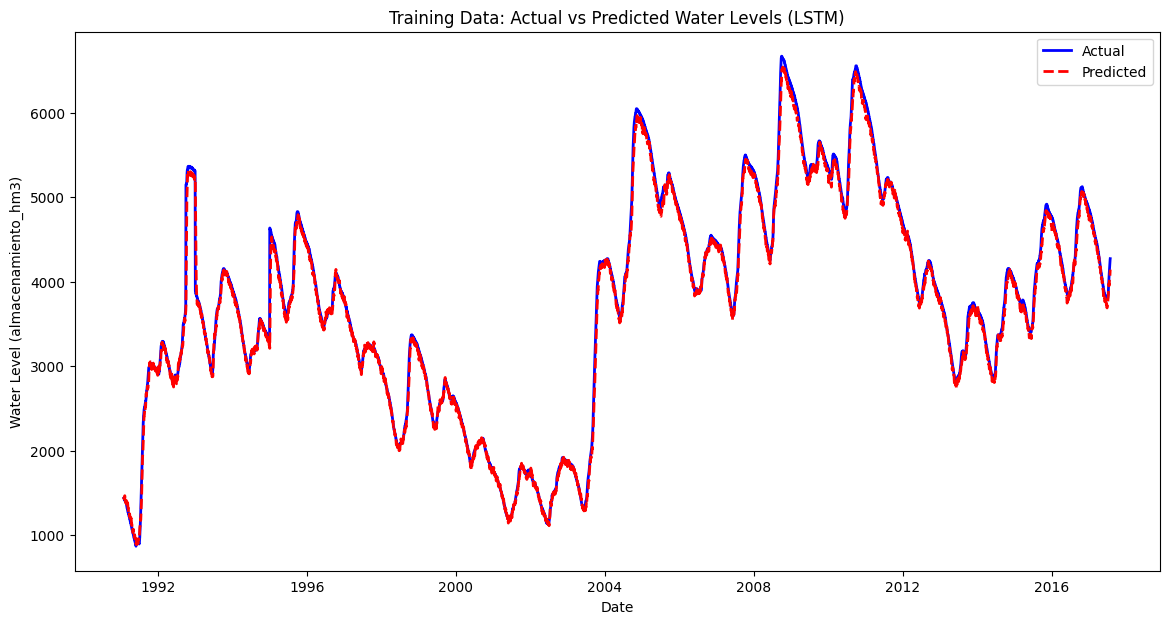

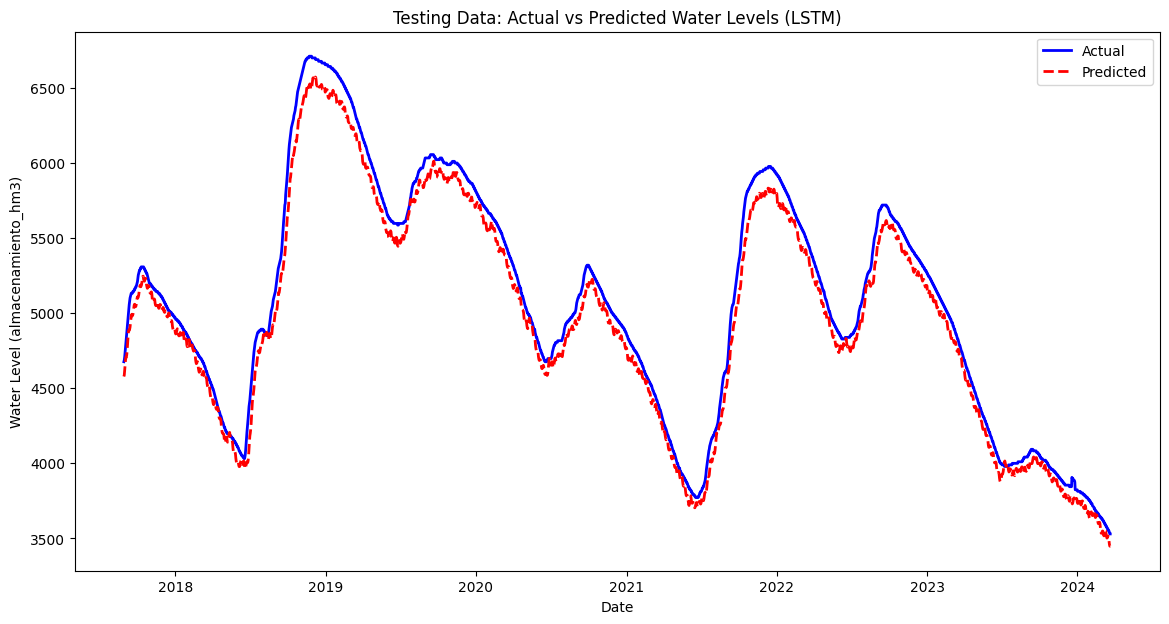

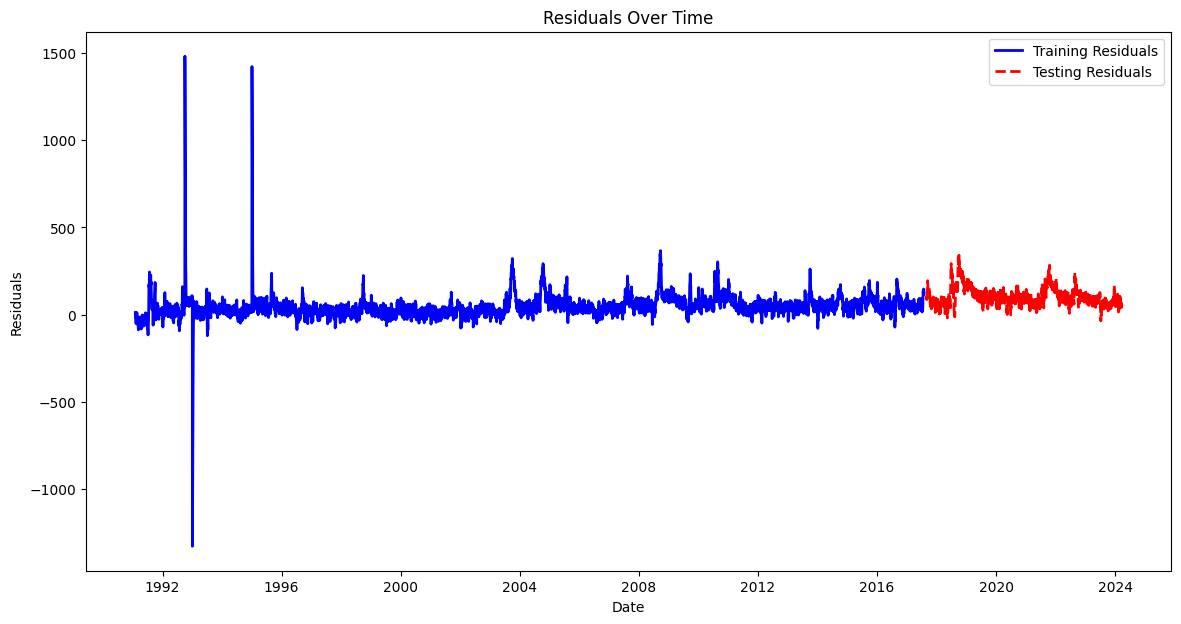

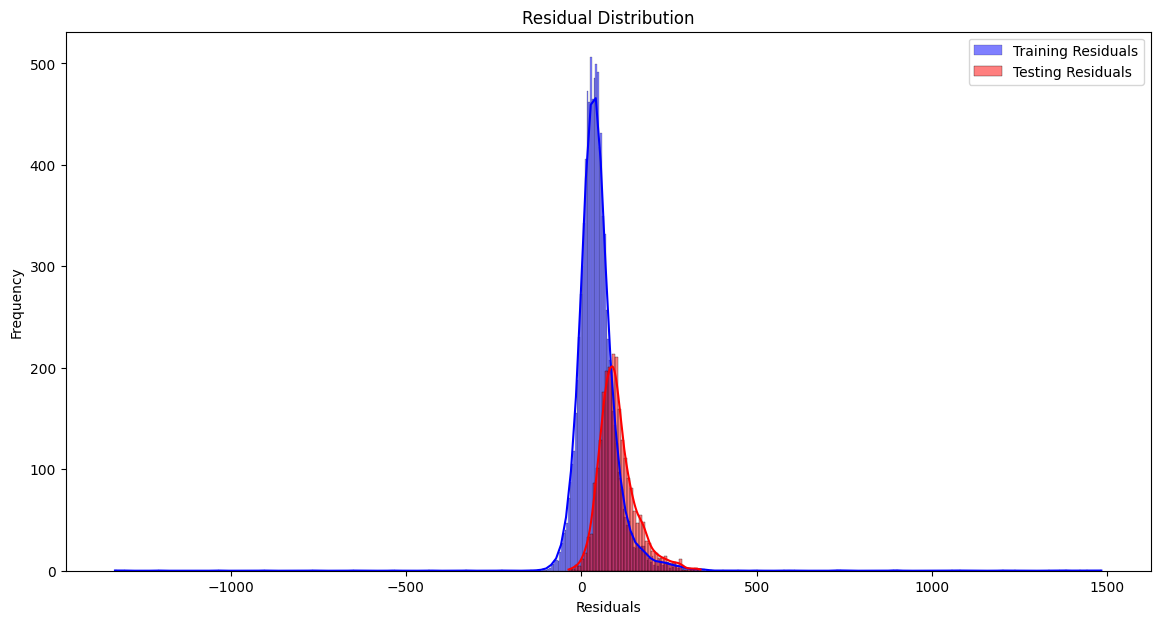

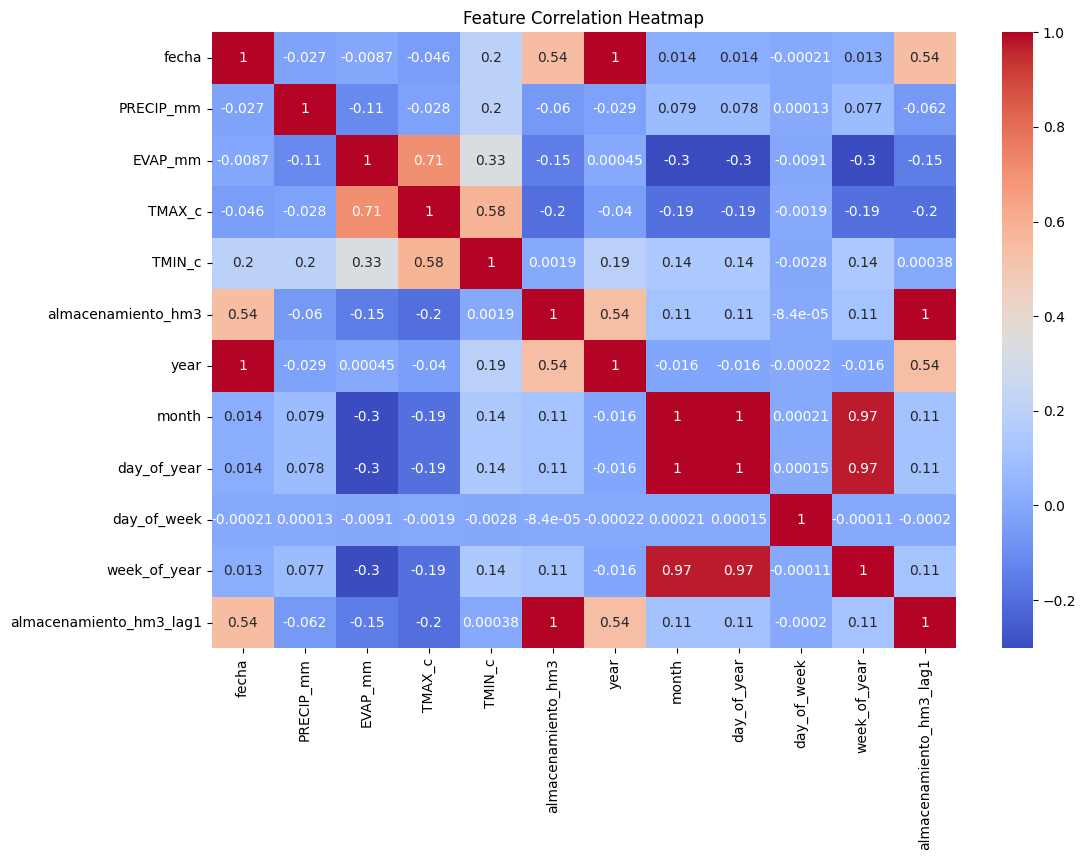

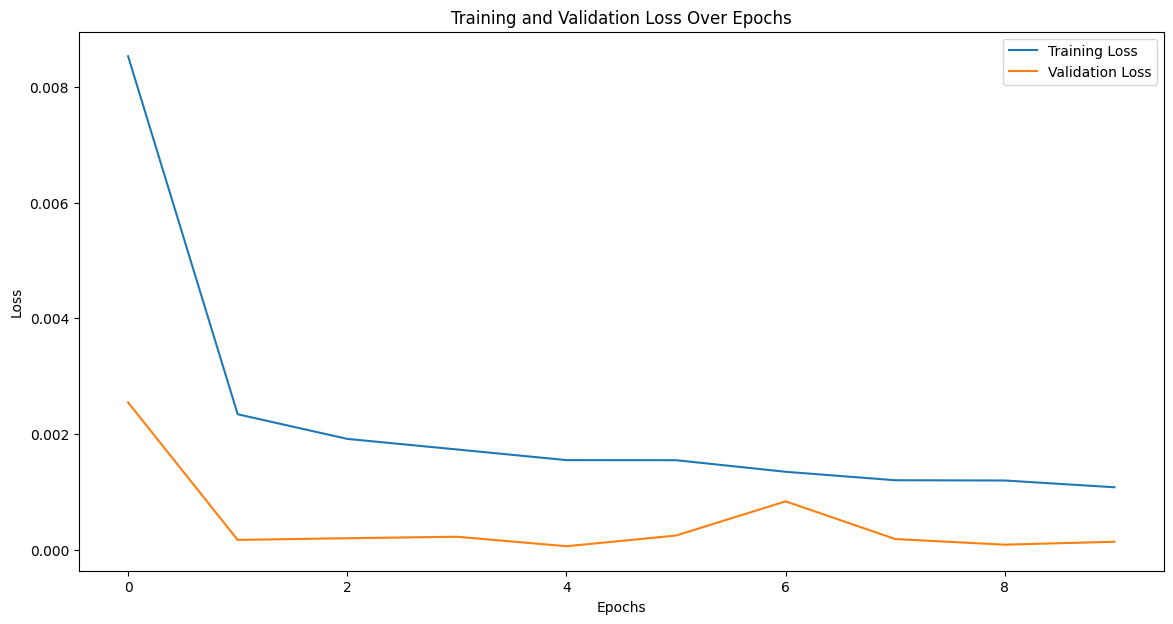

In [ ]:
import seaborn as sns

# Ensure the lengths of the data match
train_comparison_df = pd.DataFrame({'fecha': train_data['fecha'][seq_length:], 'actual': y_train_actual, 'predicted': train_predictions})
test_comparison_df = pd.DataFrame({'fecha': test_data['fecha'][seq_length:], 'actual': y_test_actual, 'predicted': test_predictions})

# Time Series Plots
def plot_time_series(data, actual, predicted, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['fecha'], actual, label='Actual', color='blue', linewidth=2)
    plt.plot(data['fecha'], predicted, label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Water Level (almacenamiento_hm3)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot original and predicted values for training data
plot_time_series(train_comparison_df, y_train_actual, train_predictions, 'Training Data: Actual vs Predicted Water Levels (LSTM)')

# Plot original and predicted values for testing data
plot_time_series(test_comparison_df, y_test_actual, test_predictions, 'Testing Data: Actual vs Predicted Water Levels (LSTM)')

# Error Analysis
train_residuals = y_train_actual - train_predictions
test_residuals = y_test_actual - test_predictions

plt.figure(figsize=(14, 7))
plt.plot(train_comparison_df['fecha'], train_residuals, label='Training Residuals', color='blue', linewidth=2)
plt.plot(test_comparison_df['fecha'], test_residuals, label='Testing Residuals', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.show()

# Residual Distribution
plt.figure(figsize=(14, 7))
sns.histplot(train_residuals, kde=True, color='blue', label='Training Residuals')
sns.histplot(test_residuals, kde=True, color='red', label='Testing Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Training and Validation Loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


For now, we observe more acceptable results (based on the initial exercise, initial LSTM), but it is still not better than the first model tested (GradientBoostingRegressor() in its variants).

## Conclusions

Observing the different methods, we conclude that both GradientBoostingRegressor and LSTM achieve acceptable results using feature engineering. In this case, adding the 1-day lag feature for 'almacenamiento_hm3' confirms, once again, the theoretical aspect and relevance of directly dependent relationships on past values to determine the next value in a time series.

After going through the complete set of steps (from data cleaning, integration and formatting (tidying), modeling and validation, to visualization), where we managed to build a dataset from extensive investigation into the government databases of our country, Mexico, where we encountered the common problem of missing data, and had to explore datasets with fewer variables but sufficiently complete to conduct experiments with ML and DL models, we ultimately explored the importance of modeling and validation through techniques like GridSearch and cross-validation, we also managed to visually and numerically verify the accuracy of the predictions, we can conclude that it was a very enriching activity that allowed us to reinforce our knowledge in the problem-solving cycle based on AI for ML and DL. Even though it was a simple problem, it involved all the everyday aspects necessary to propose a well-founded solution, and in this case, one closer to a value proposition for the sustainable field. Undoubtedly, an integrative activity.

## Useful links



1.   Dataset 1 - Climatological Normals by State (Jalisco, Lake Chapala Station). Retrieved on June 10, 2024, from https://smn.conagua.gob.mx/es/informacion-climatologica-por-estado?estado=jal

2.   Dataset 2 - Water Levels in Lake Chapala, Jalisco. Retrieved on June 10, 2024, from https://datos.jalisco.gob.mx/dataset/registro-de-niveles-de-agua-en-la-presa-lago-de-chapala-jalisco

3.   GradientBoostingRegressor Documentation. Retrieved on June 10, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

4.   LSTM - Long Short-Term Memory Networks. Retrieved on June 10, 2024, from https://www.sciencedirect.com/topics/computer-science/long-short-term-memory-network

5.   GridSearchCV Documentation. Retrieved on June 10, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

6.   Cross-Validation in Machine Learning. Retrieved on June 10, 2024, from https://scikit-learn.org/stable/modules/cross_validation.html

